___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

#### *ii. Load Dataset*

In [95]:
df = pd.read_csv('treetypes.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [96]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [99]:
df.nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [100]:
tree_type_dist = pd.DataFrame(df.Cover_Type.value_counts())
tree_type_dist["ratio"] = df.Cover_Type.value_counts(normalize = True)*100
tree_type_dist.columns = ["count", "ratio"]
tree_type_dist

,count,ratio
5,36079,14.432
1,35836,14.334
2,35780,14.312
6,35695,14.278
7,35690,14.276
4,35529,14.212
3,35391,14.156


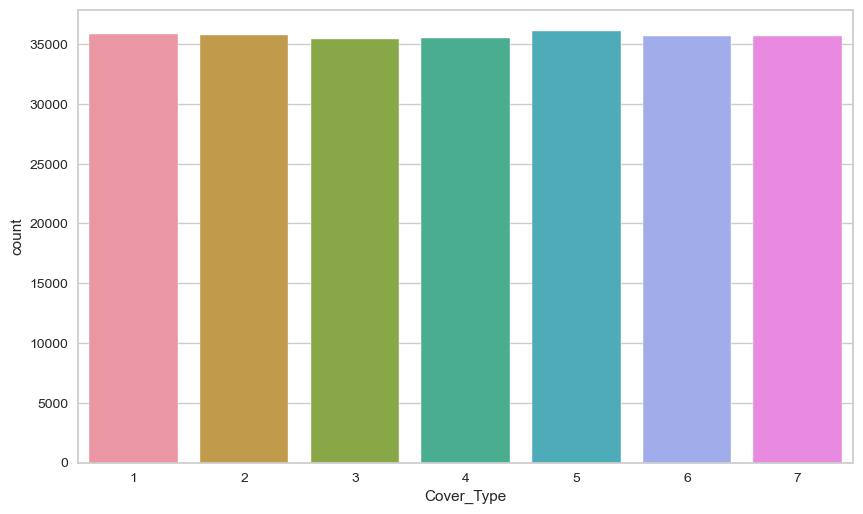

In [101]:
sns.countplot(df.Cover_Type);

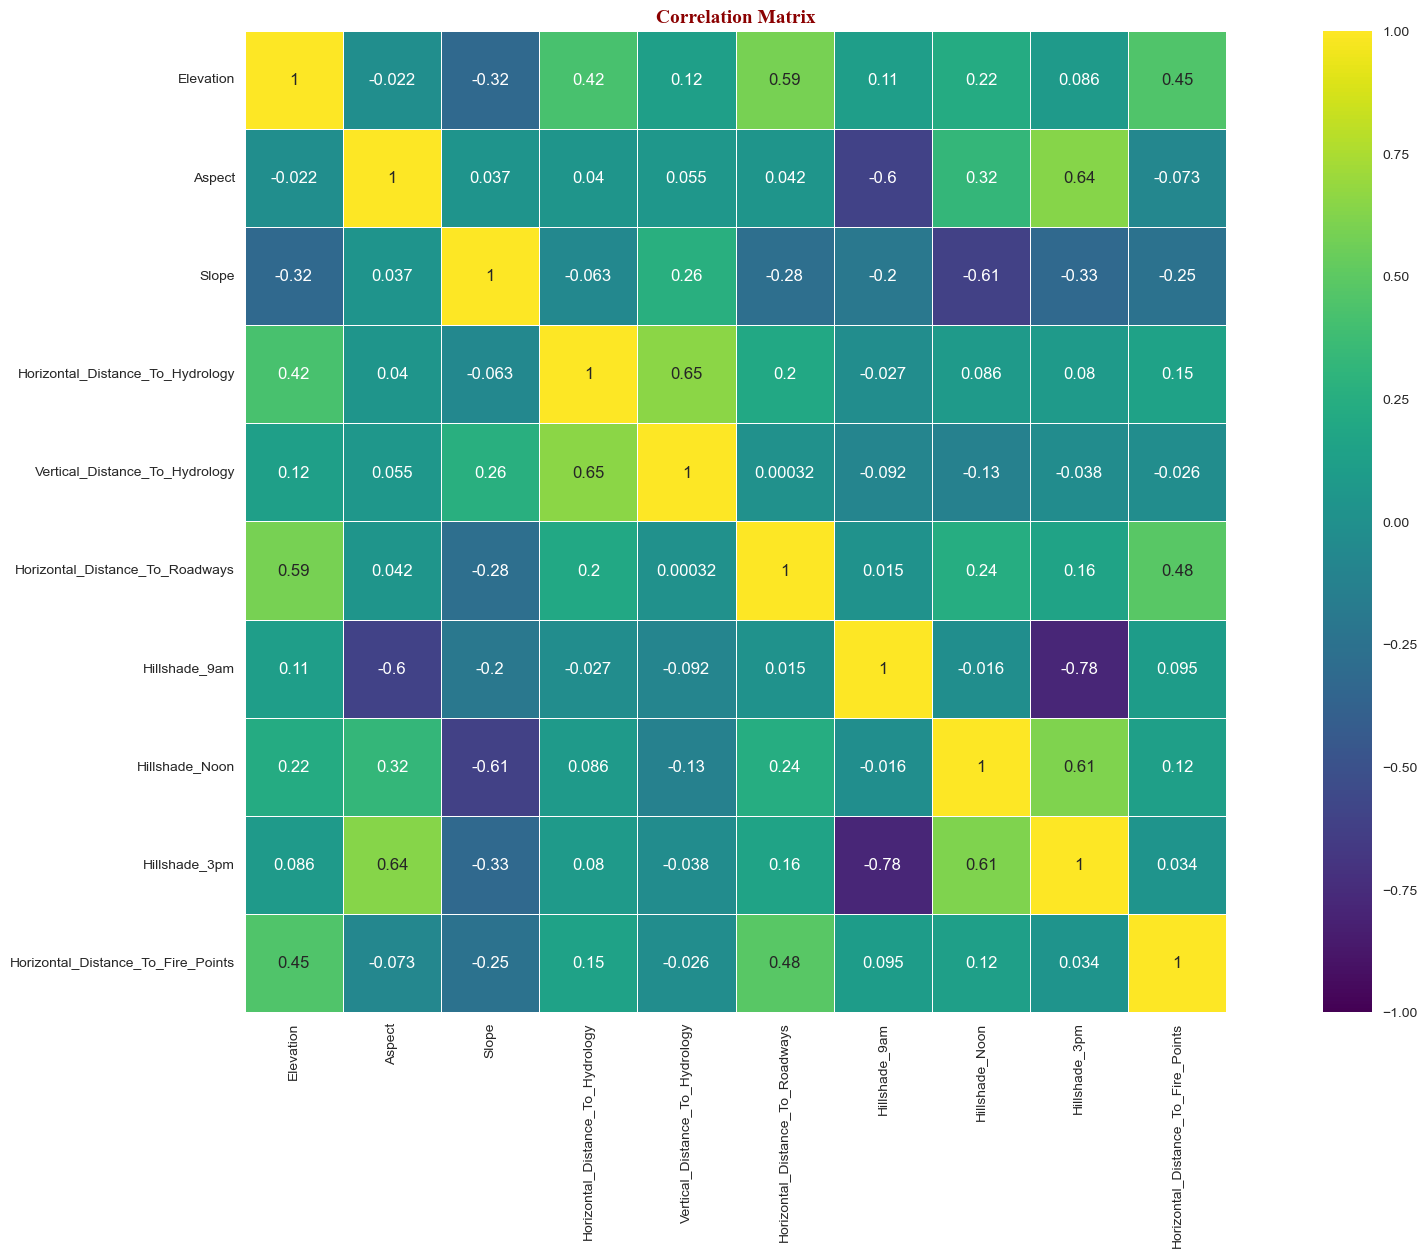

In [102]:
corr_matrix = df[df.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

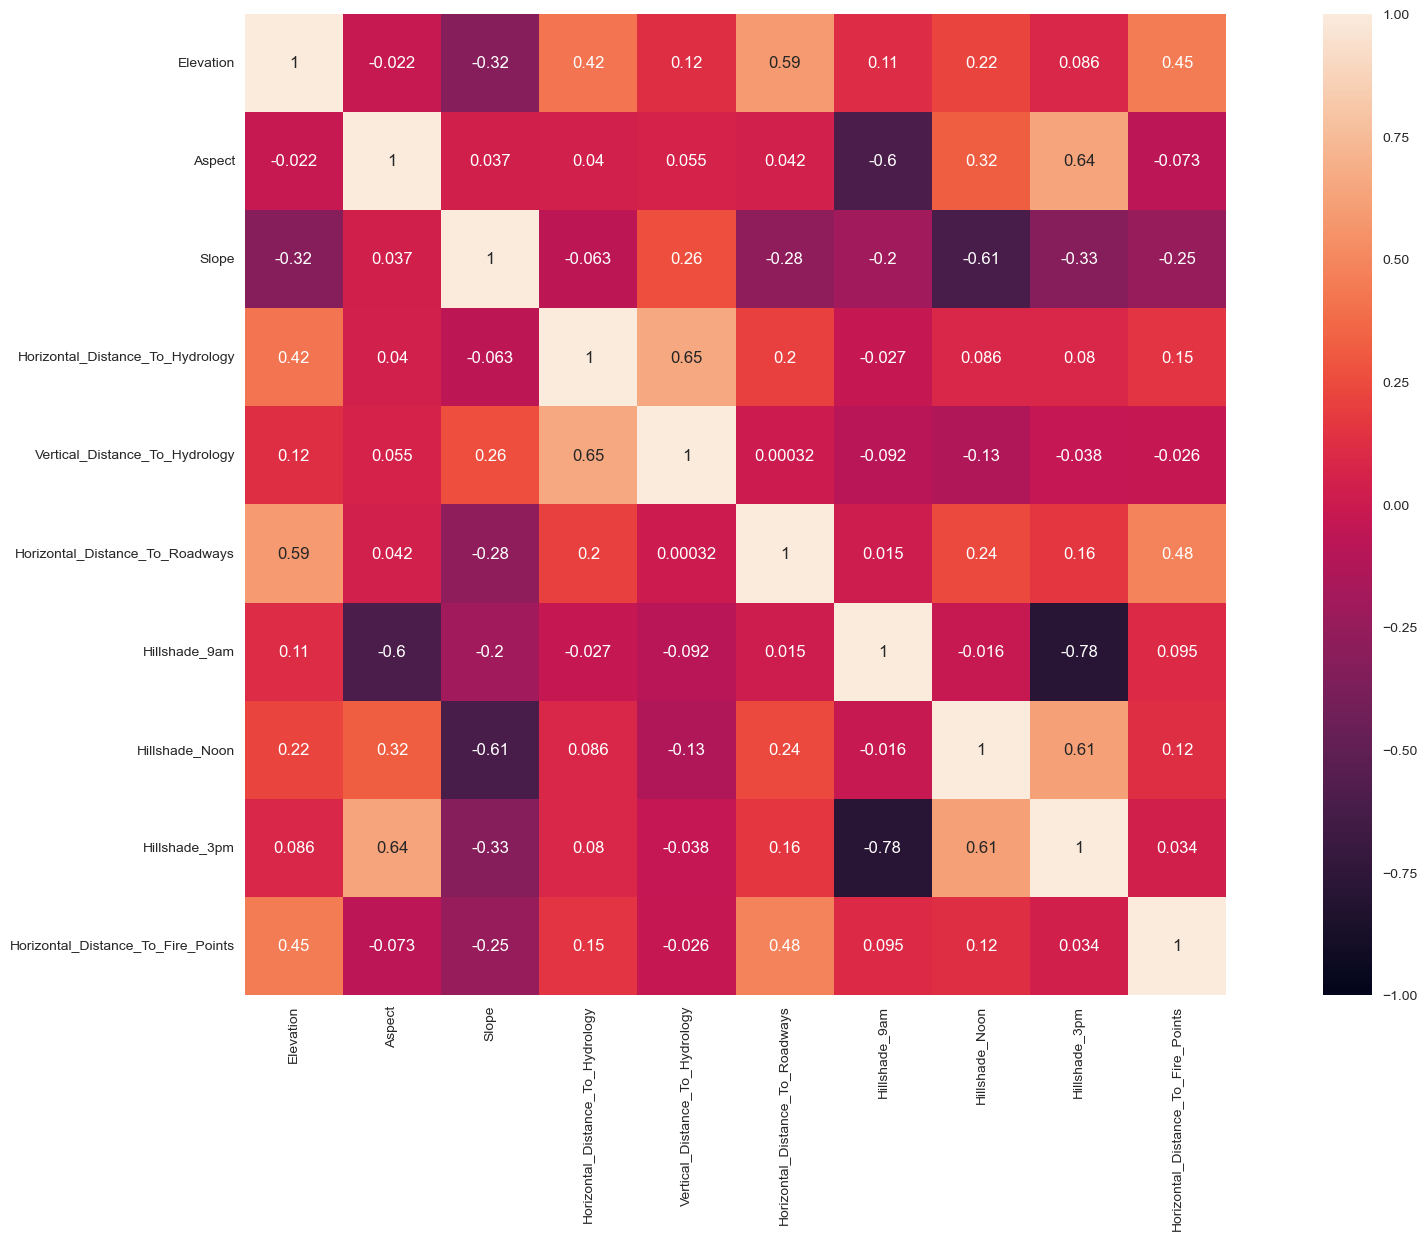

In [103]:
plt.figure(figsize=(25, 13))
sns.heatmap(df[df.columns[:10]].corr(), square=True, annot=True, vmin=-1, vmax=1);

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [104]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

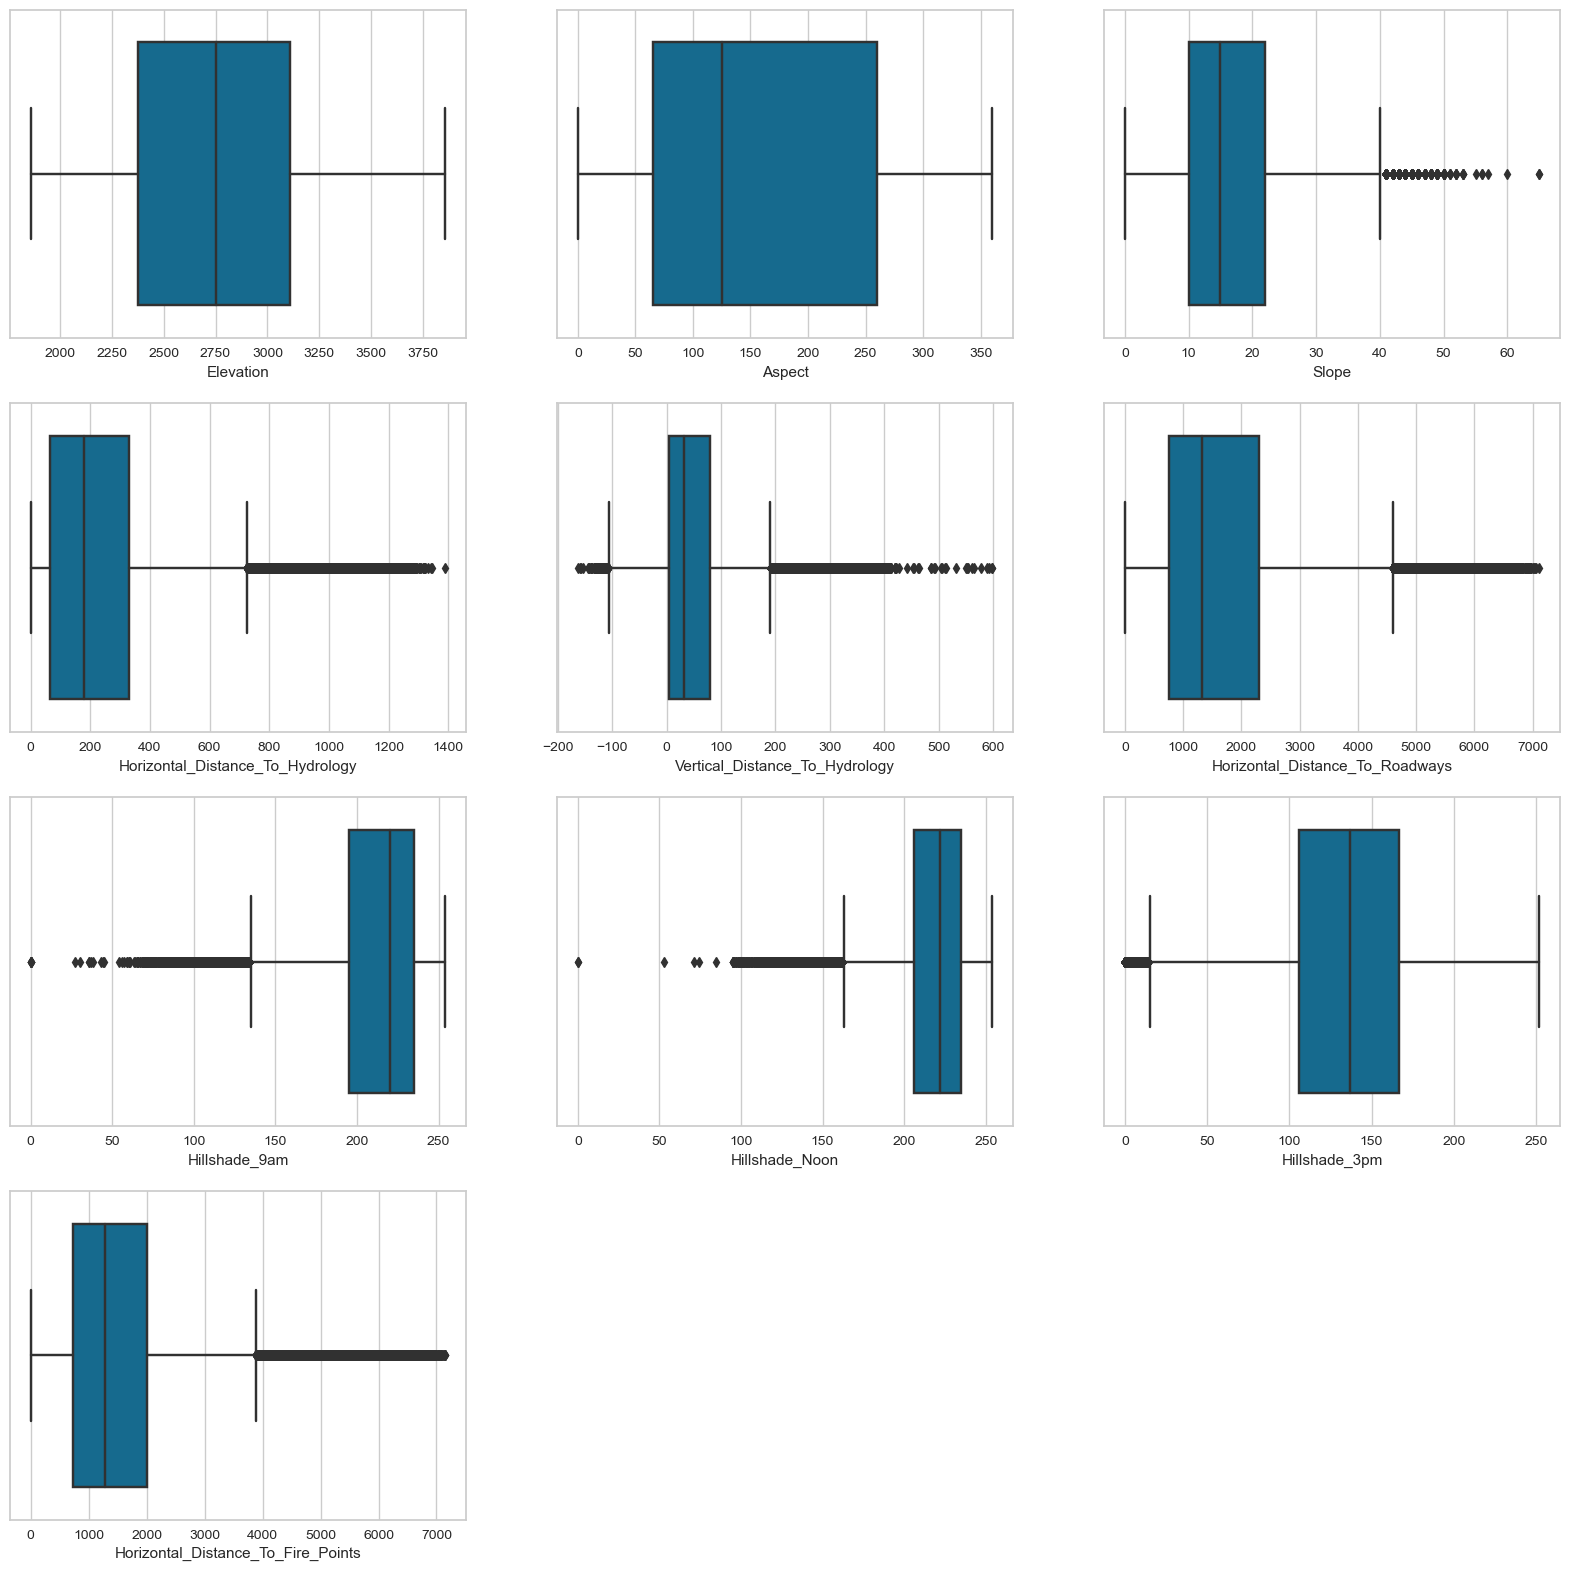

In [105]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

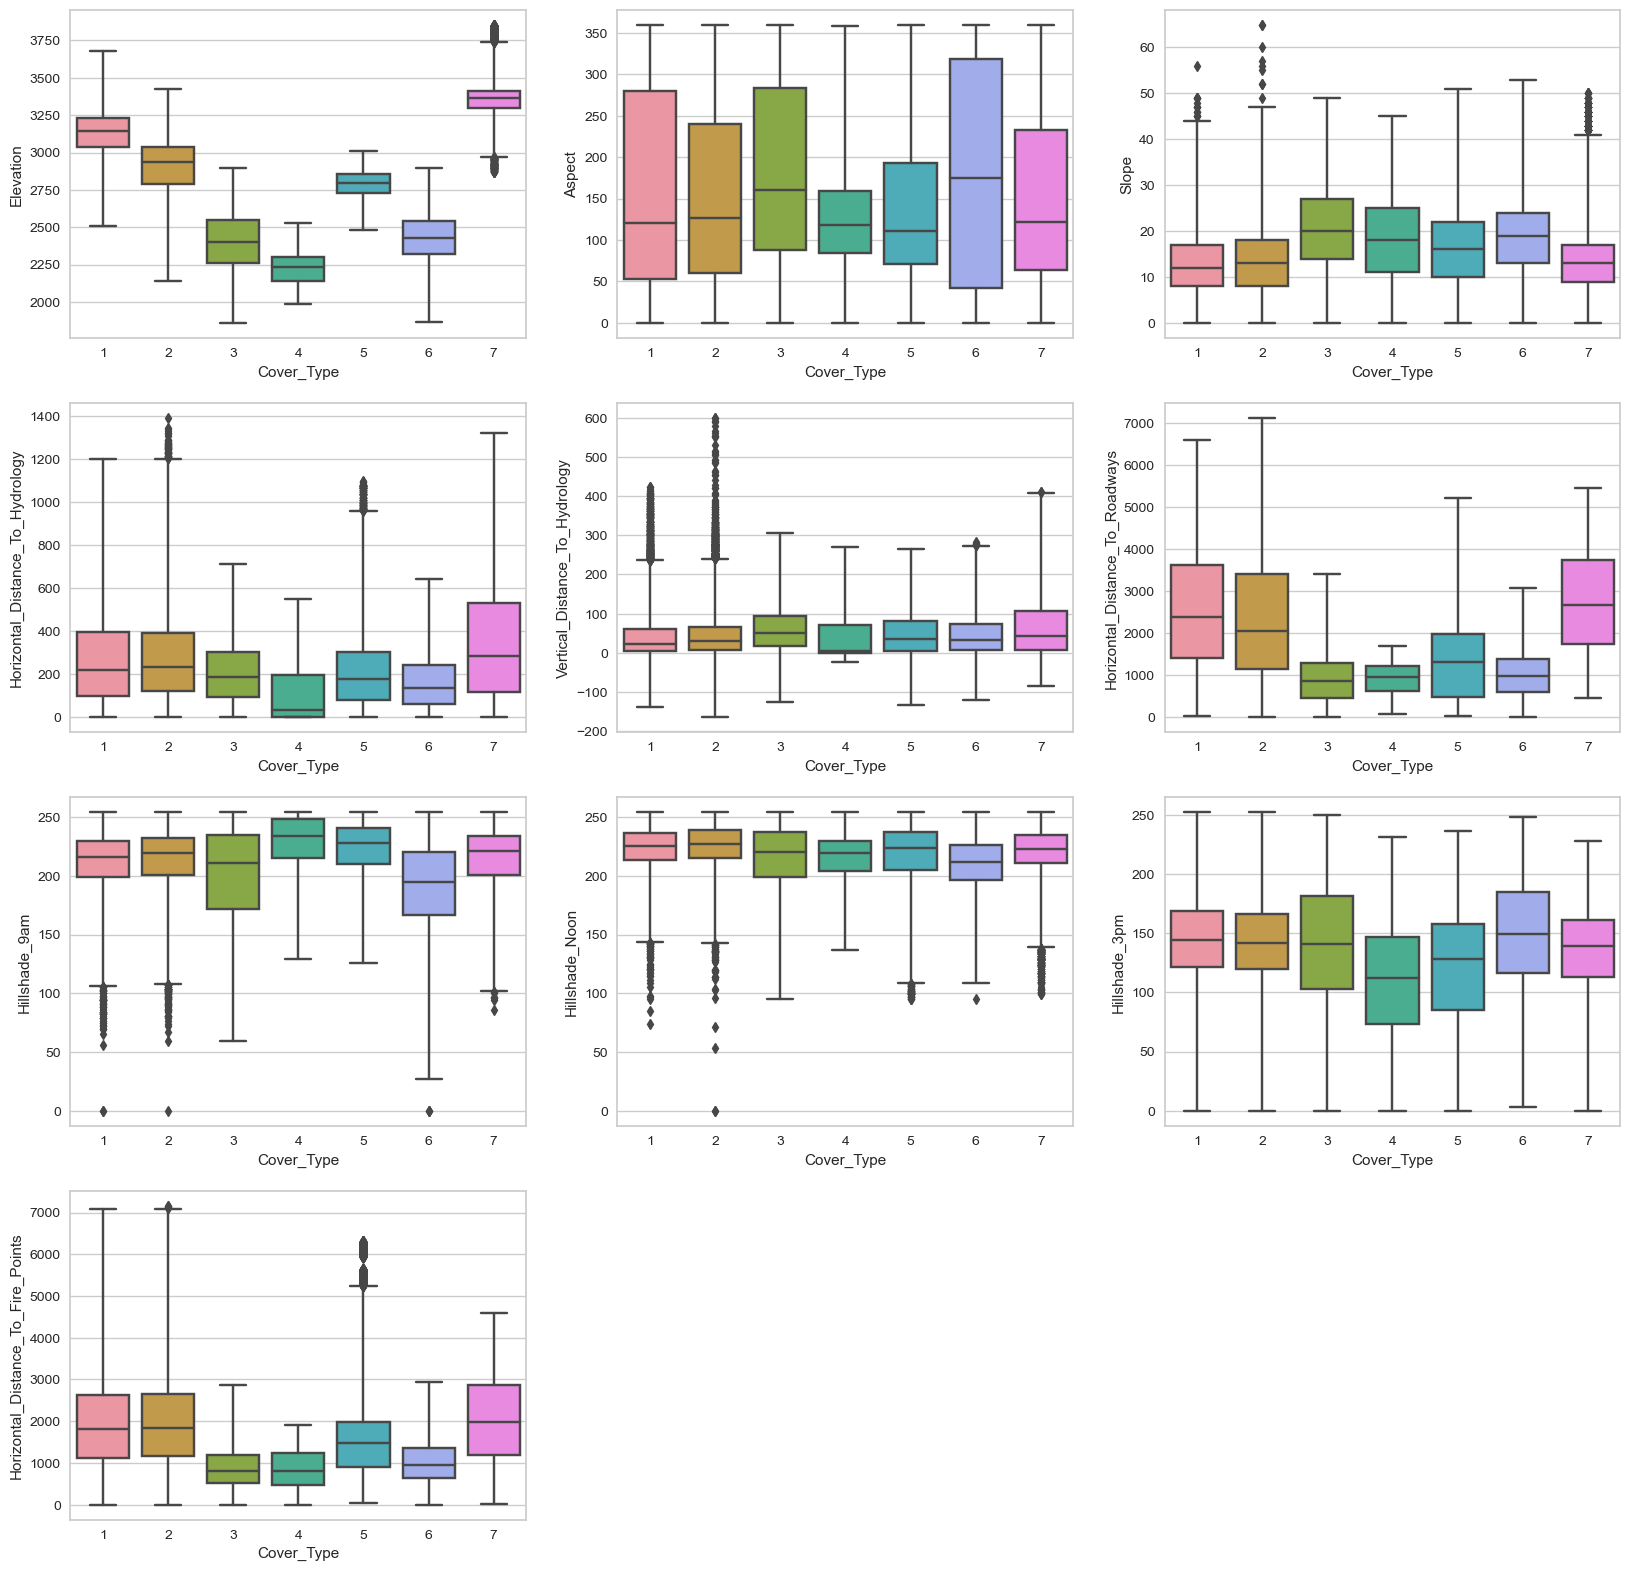

In [106]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = df, whis=3)

### Deal with Outliers

#### *ii. Drop Outliers*

In [107]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [108]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")
    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 2.5)
    plt.xlabel("ROOT SQUARE - IQR=2.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 2.5)
    plt.xlabel("LOGARITMIC - IQR=2.5")
    plt.show()

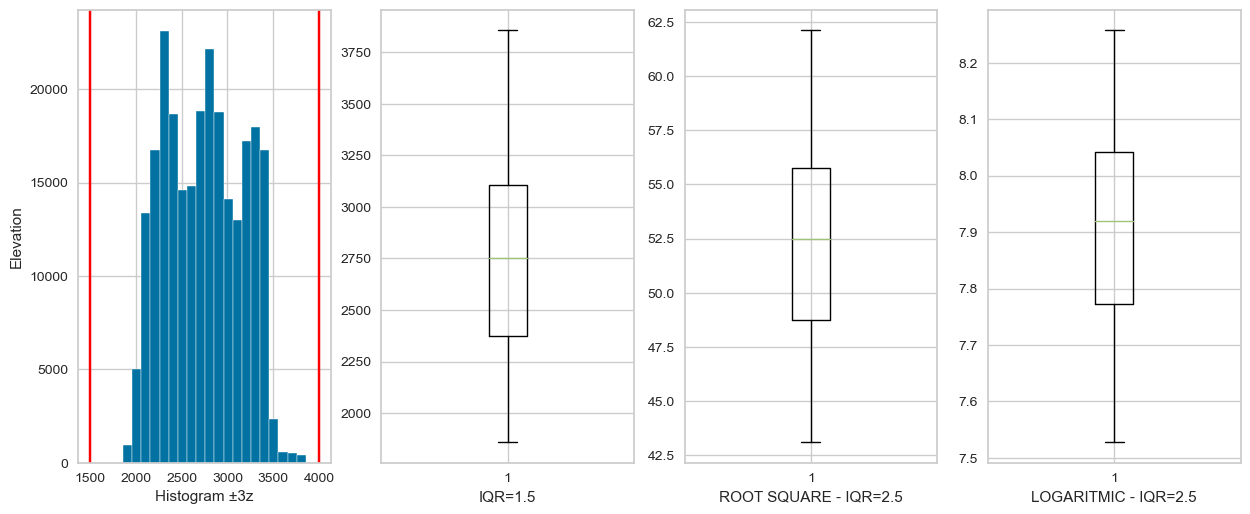

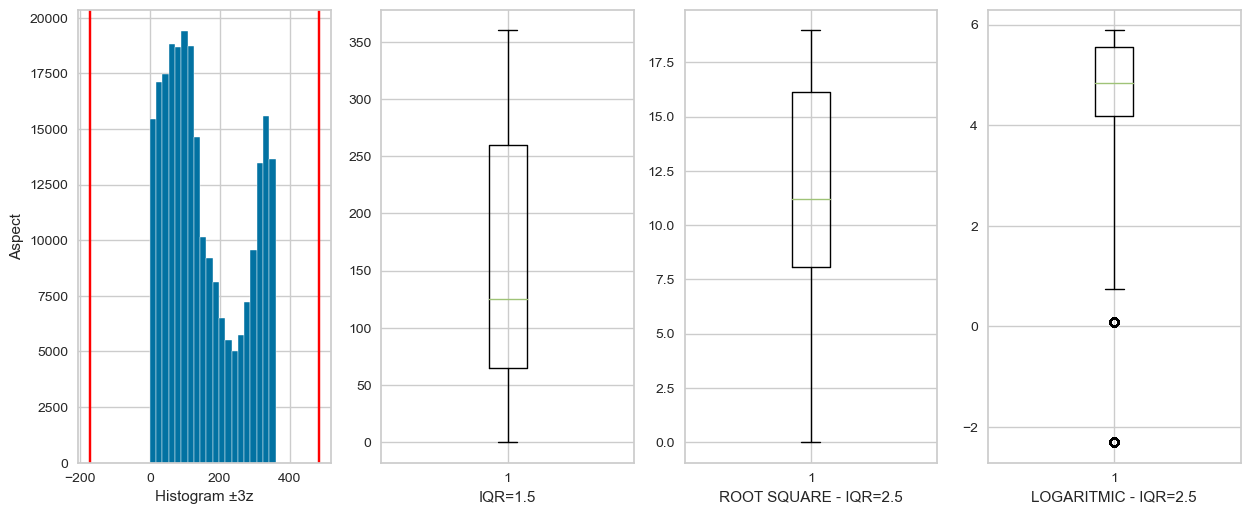

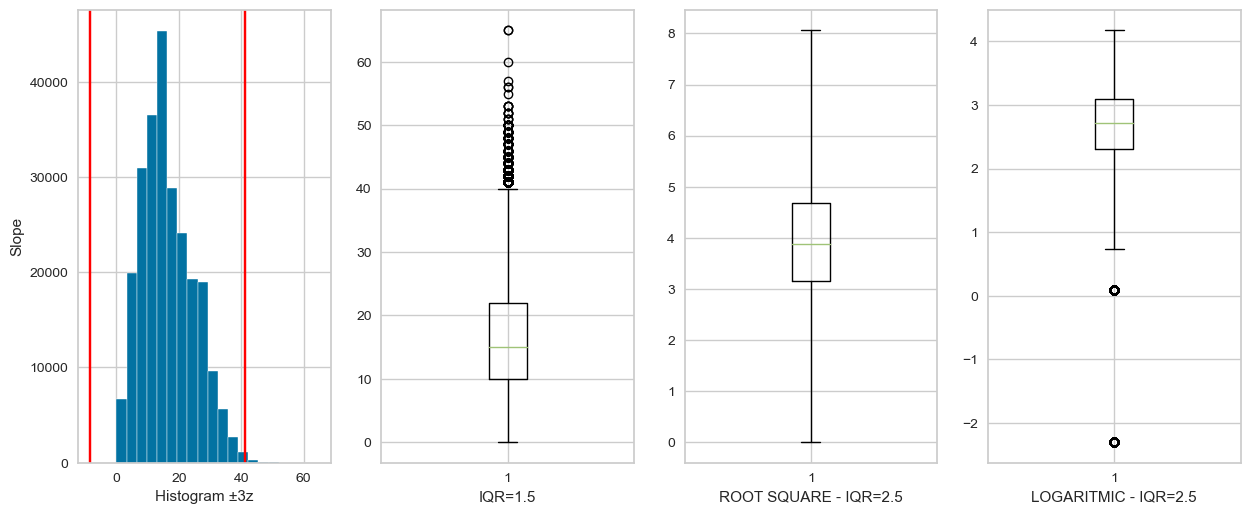

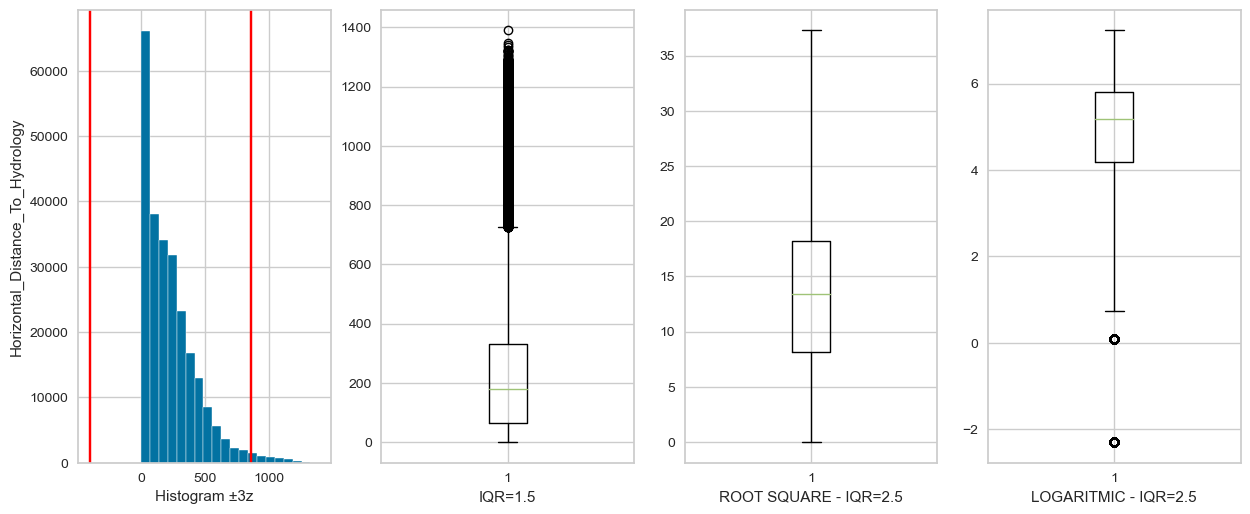

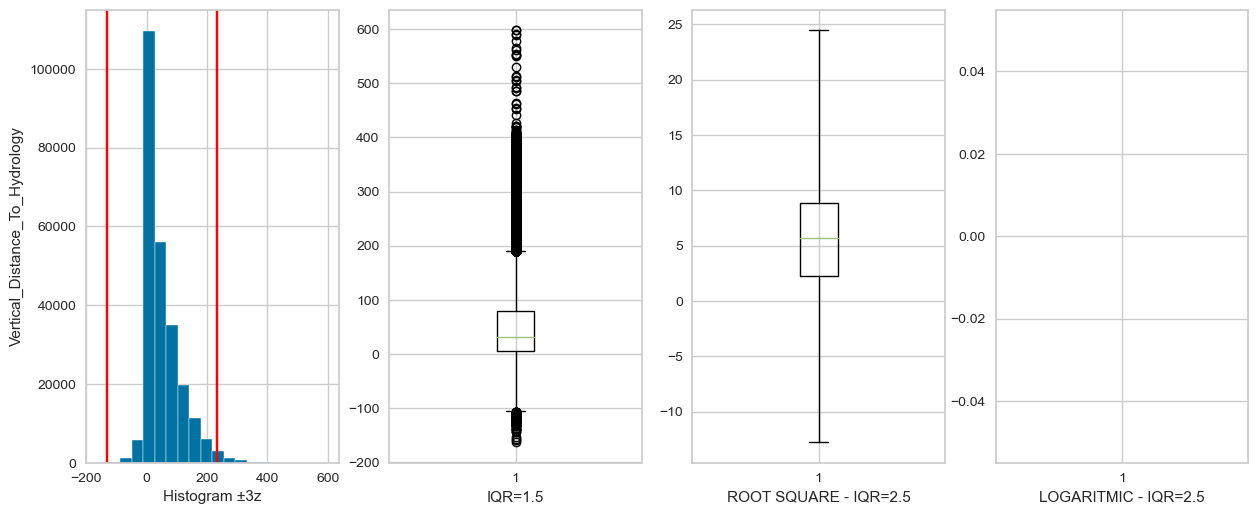

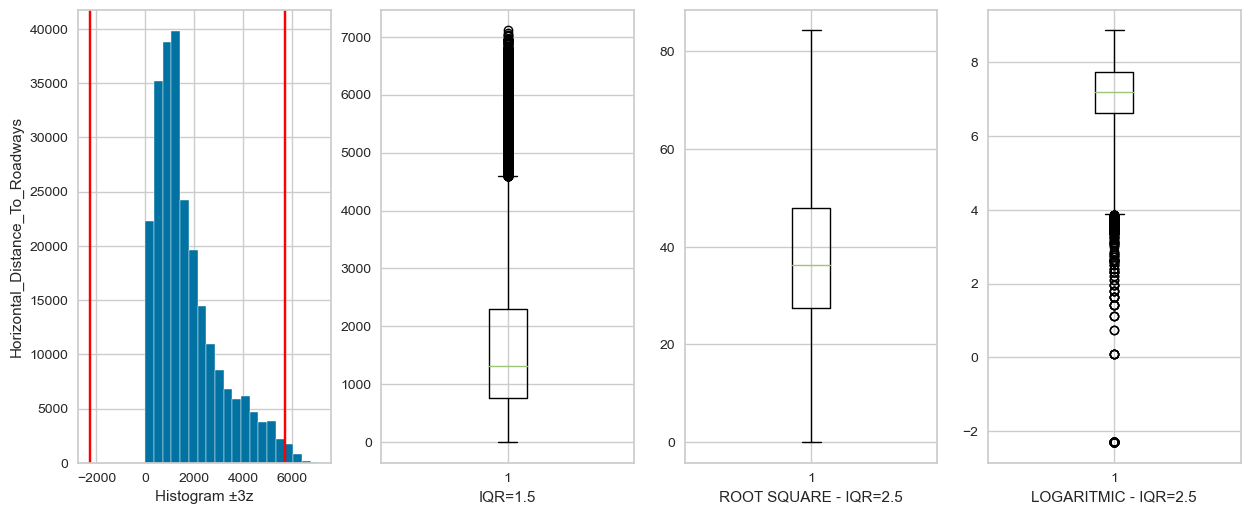

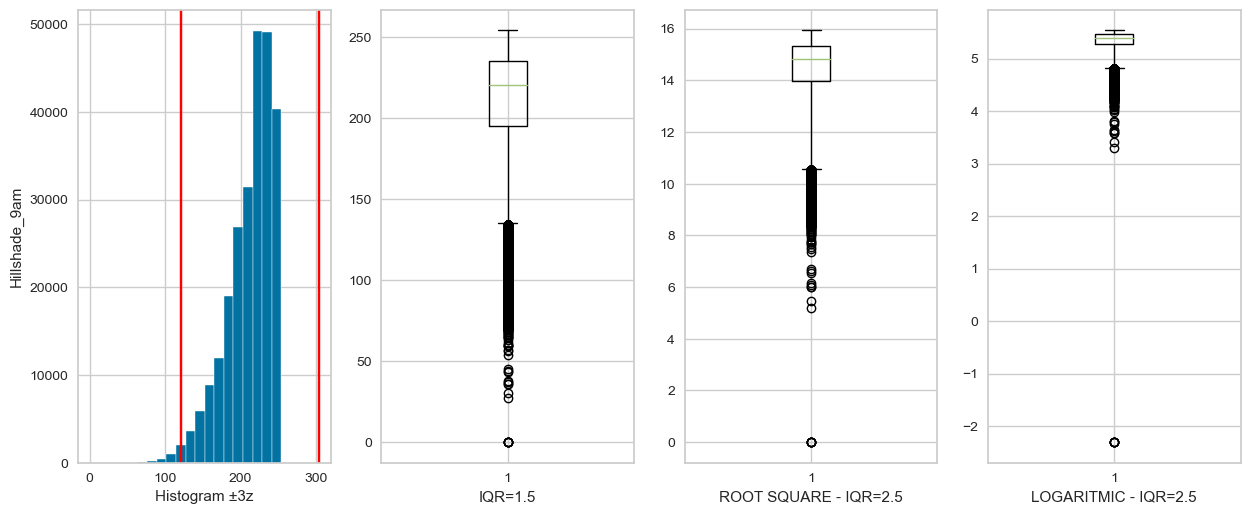

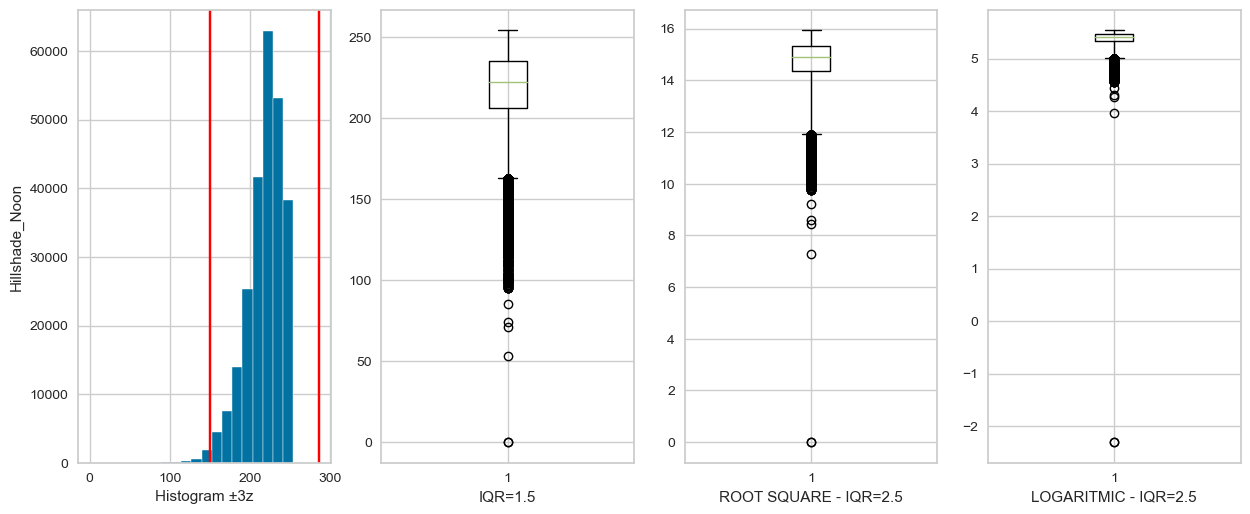

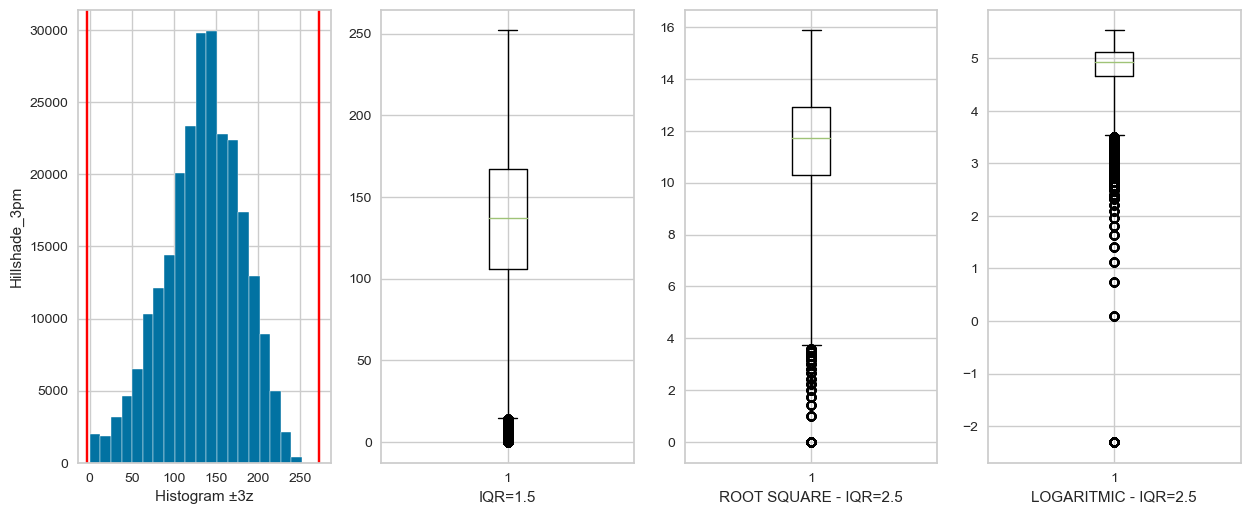

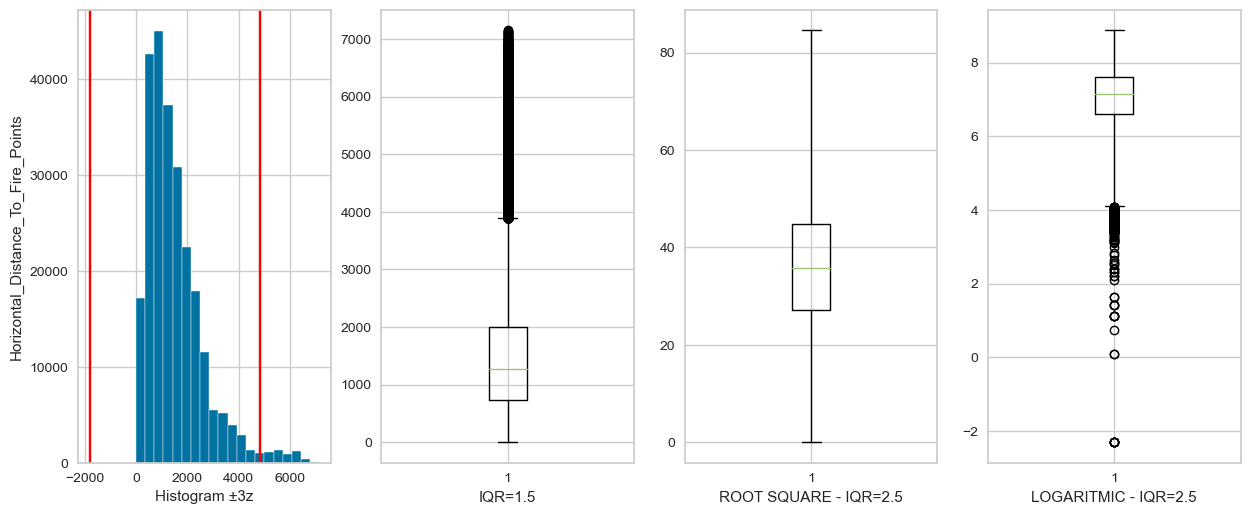

In [109]:
for i in df.columns[:10]:
    col_plot(df,i)

In [110]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]+0.1)

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=22)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show()   

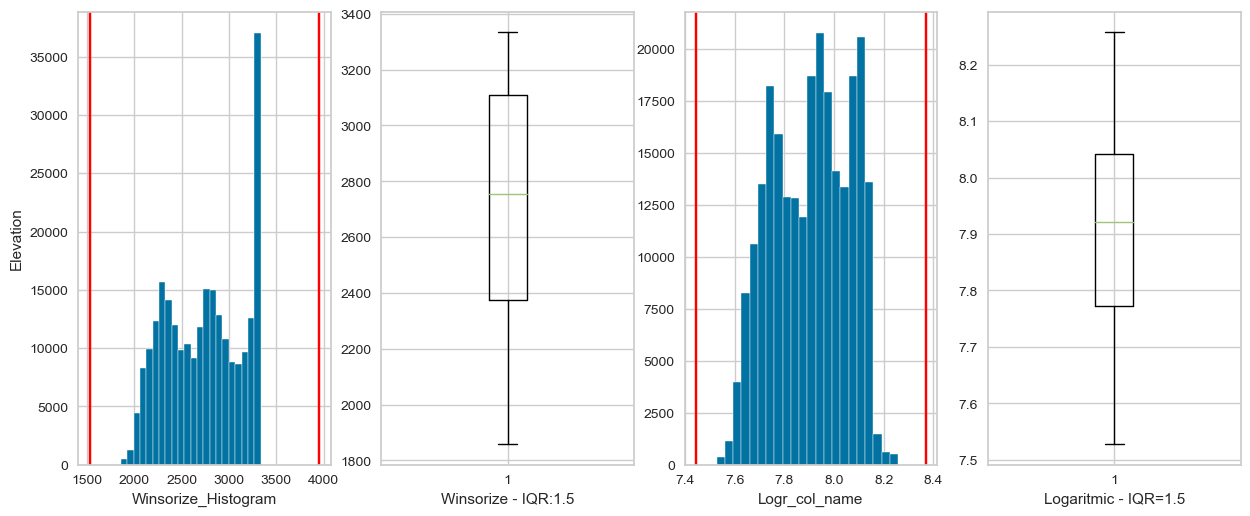

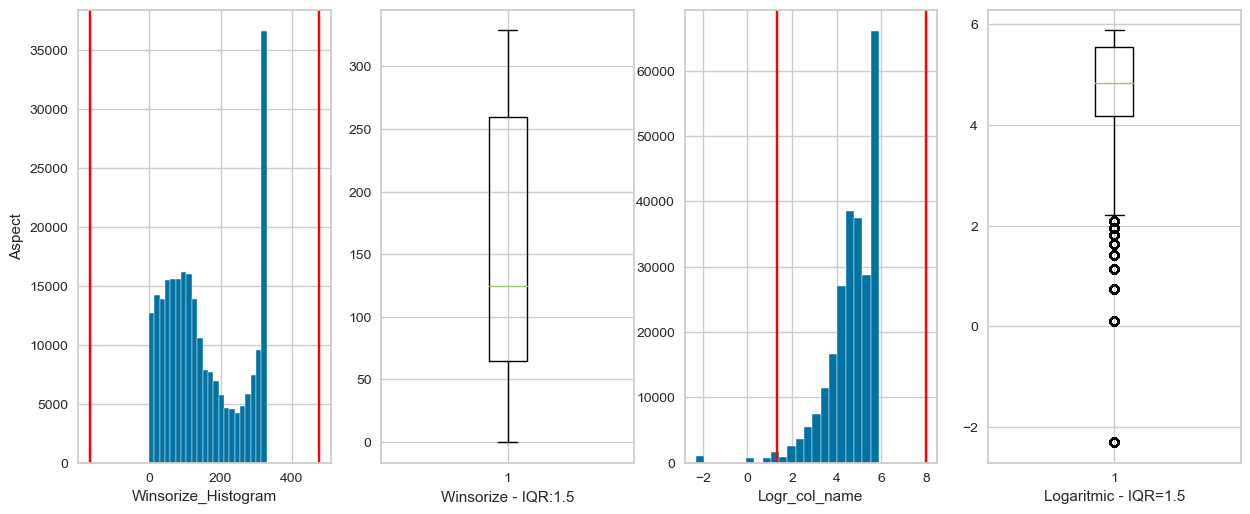

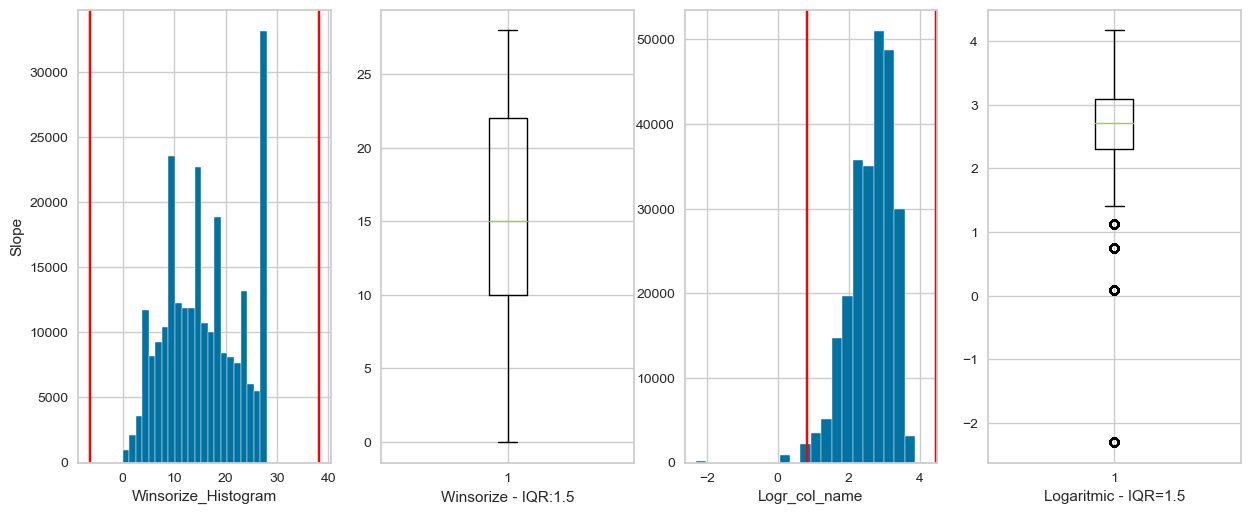

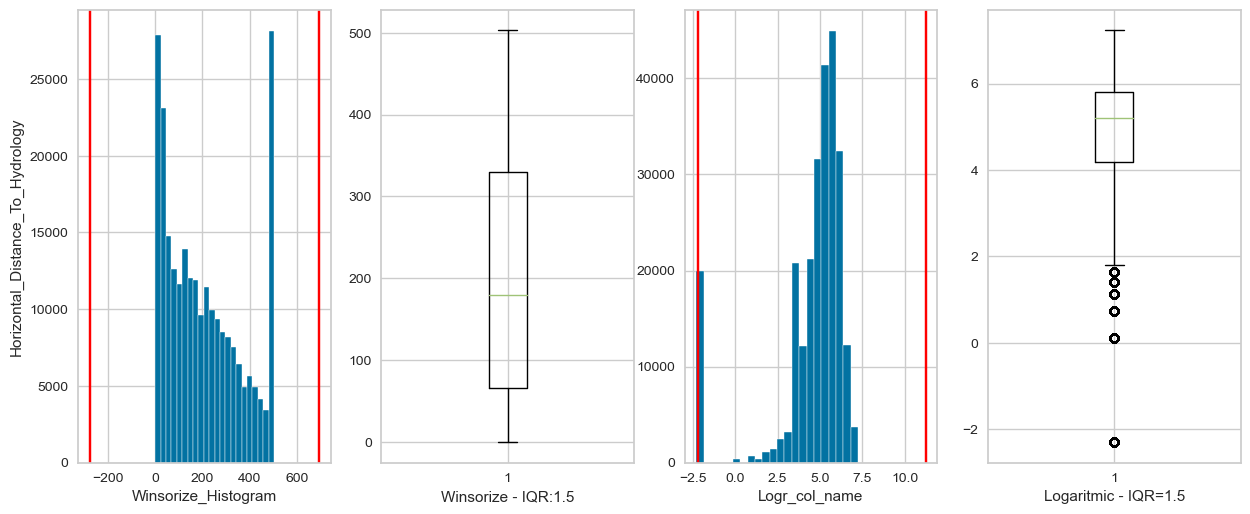

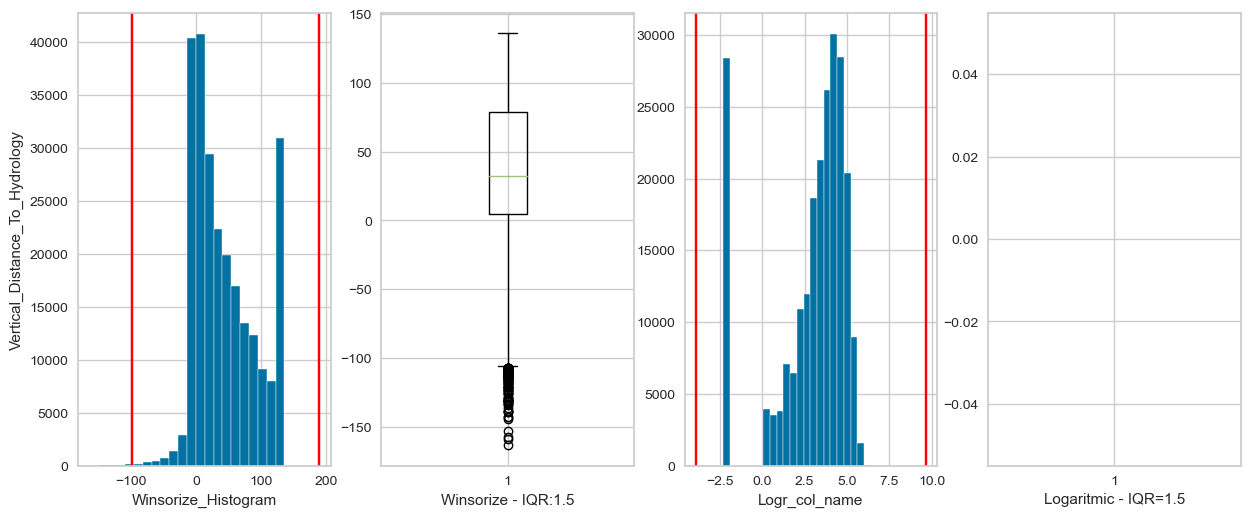

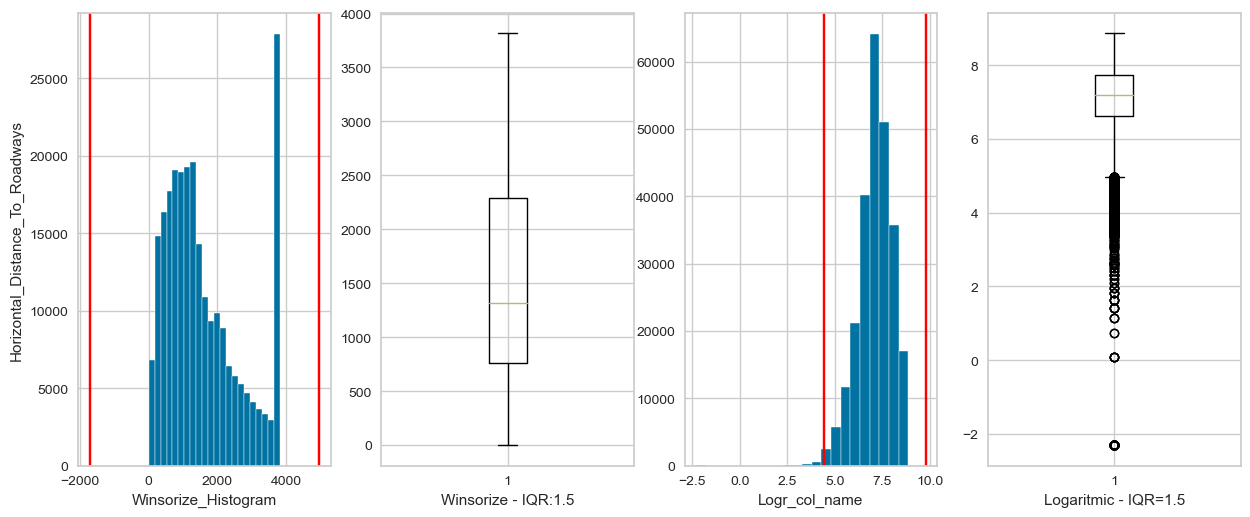

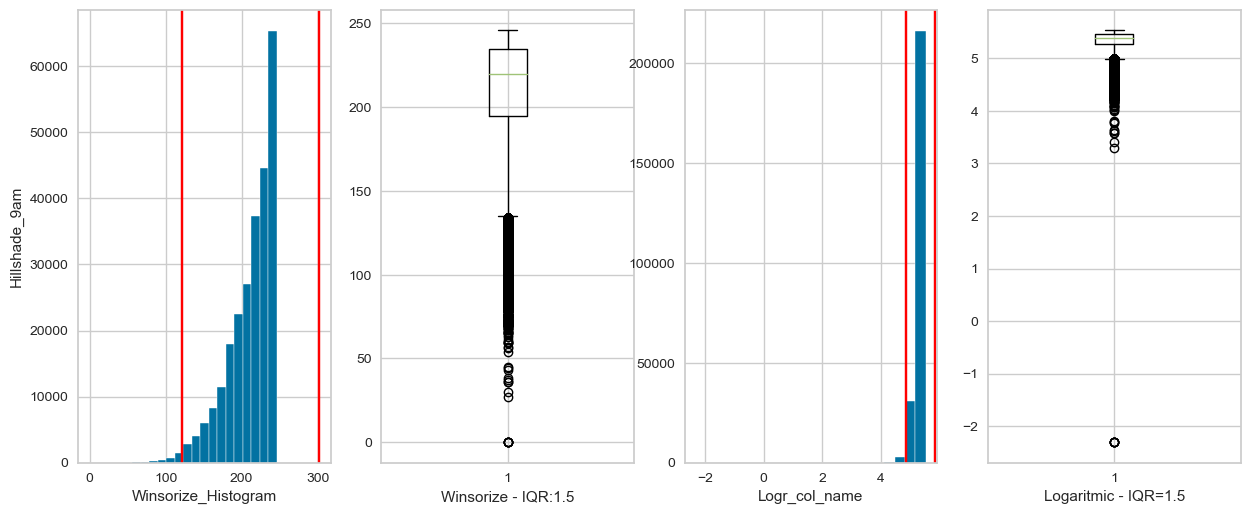

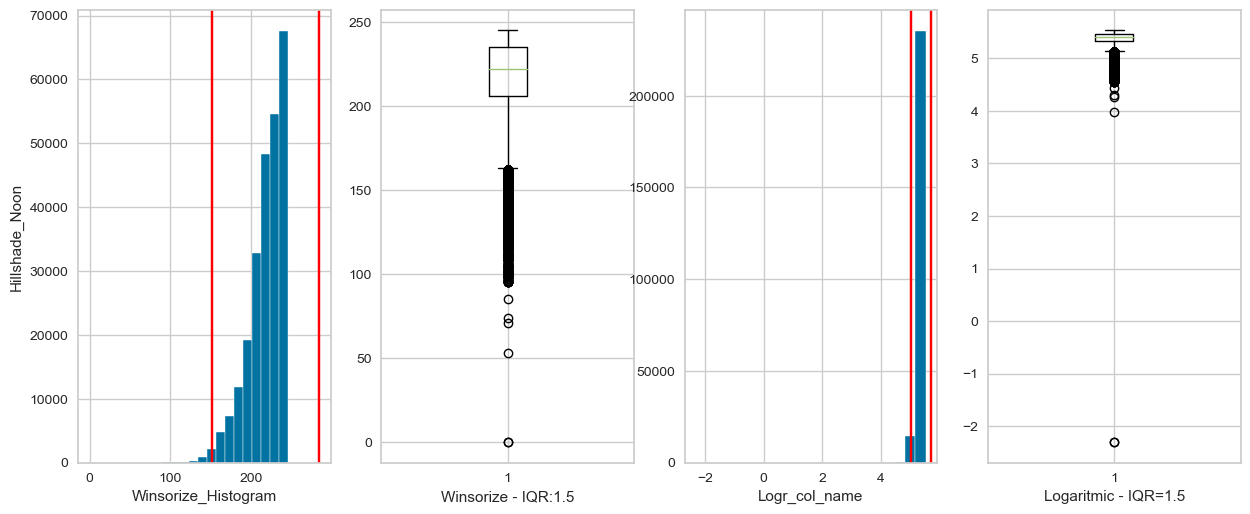

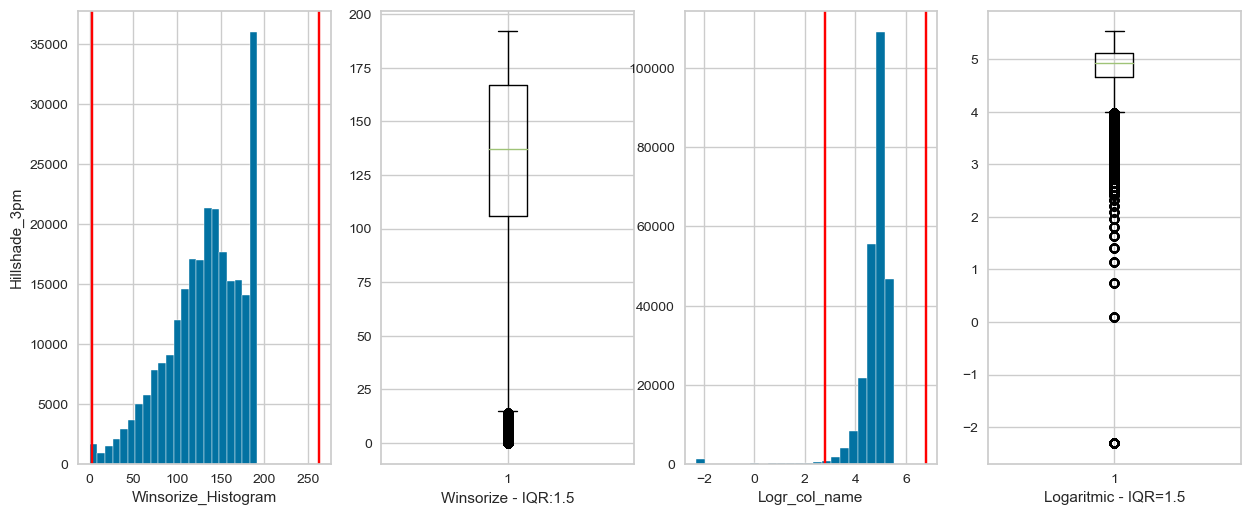

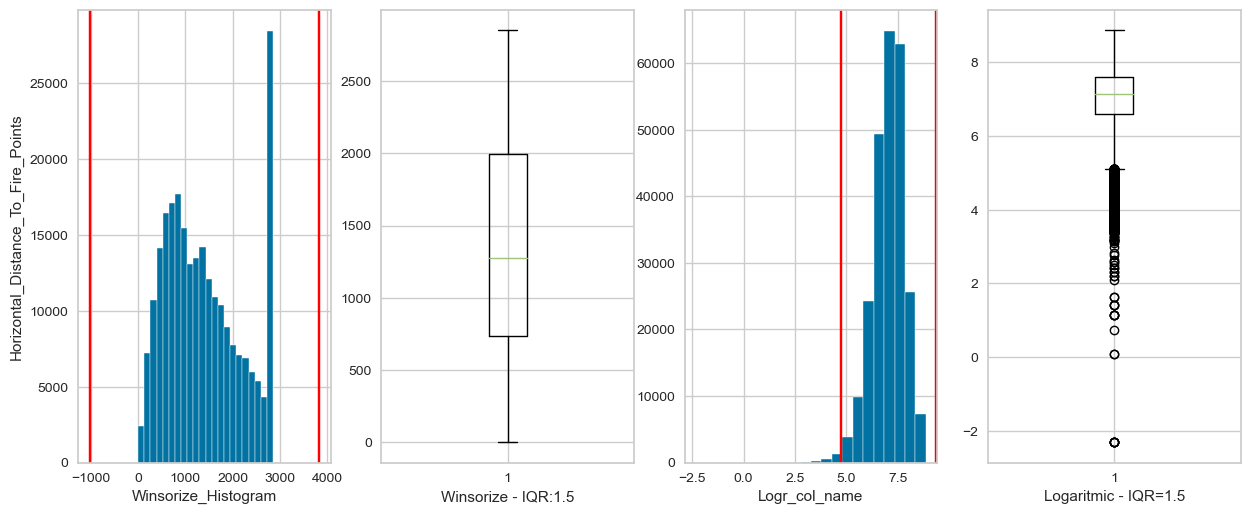

In [111]:
for i in df.columns[:10]:
    plot_winsorize(df,i)

In [112]:
features=['Elevation', 
#            'Aspect', # angle
           'Slope', 
           'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', # not expected normal distribution
            'Hillshade_9am', 
            'Hillshade_Noon',
            'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points']

In [113]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.1))

In [114]:
df_log=df.copy()
for i in features:
    df_log[i]=np.log(df_log[i])

In [115]:
df_root=df.copy()
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
for i in features:
    df_root[i]=df_root[i].apply(f)

In [116]:
from numpy import percentile
from scipy.stats import zscore
from scipy import stats

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [117]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [118]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [119]:
print("Number of Outliers for k*IQR\n")
k=3

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for k*IQR

3 outliers in 'Slope'
732 outliers in 'Horizontal_Distance_To_Hydrology'
957 outliers in 'Vertical_Distance_To_Hydrology'
17 outliers in 'Horizontal_Distance_To_Roadways'
78 outliers in 'Hillshade_9am'
194 outliers in 'Hillshade_Noon'
0 outliers in 'Hillshade_3pm'
2394 outliers in 'Horizontal_Distance_To_Fire_Points'

4375 OUTLIERS TOTALLY


In [120]:
k=2
print(f"Number of Outliers for {k}*IQR after Winsorised\n")

total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Winsorised

5 outliers in 'Vertical_Distance_To_Hydrology'
1677 outliers in 'Hillshade_9am'
1749 outliers in 'Hillshade_Noon'
0 outliers in 'Hillshade_3pm'

3431 OUTLIERS TOTALLY


In [121]:
k=3
print(f"Number of Outliers for {k}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_log, col)[2] > 0:
        outliers=detect_outliers(df_log, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 3*IQR after Logarithmed

142 outliers in 'Slope'
19997 outliers in 'Horizontal_Distance_To_Hydrology'
155 outliers in 'Horizontal_Distance_To_Roadways'
1387 outliers in 'Hillshade_9am'
841 outliers in 'Hillshade_Noon'
4192 outliers in 'Hillshade_3pm'
168 outliers in 'Horizontal_Distance_To_Fire_Points'

26882 OUTLIERS TOTALLY


In [122]:
k=2.2
print(f"Number of Outliers for {k}*IQR after Root Square\n")

total=0
for col in features:
    if detect_outliers(df_root, col)[2] > 0:
        outliers=detect_outliers(df_root, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2.2*IQR after Root Square

2 outliers in 'Slope'
0 outliers in 'Horizontal_Distance_To_Hydrology'
11 outliers in 'Vertical_Distance_To_Hydrology'
0 outliers in 'Horizontal_Distance_To_Roadways'
2544 outliers in 'Hillshade_9am'
1908 outliers in 'Hillshade_Noon'
2972 outliers in 'Hillshade_3pm'
23 outliers in 'Horizontal_Distance_To_Fire_Points'

7460 OUTLIERS TOTALLY


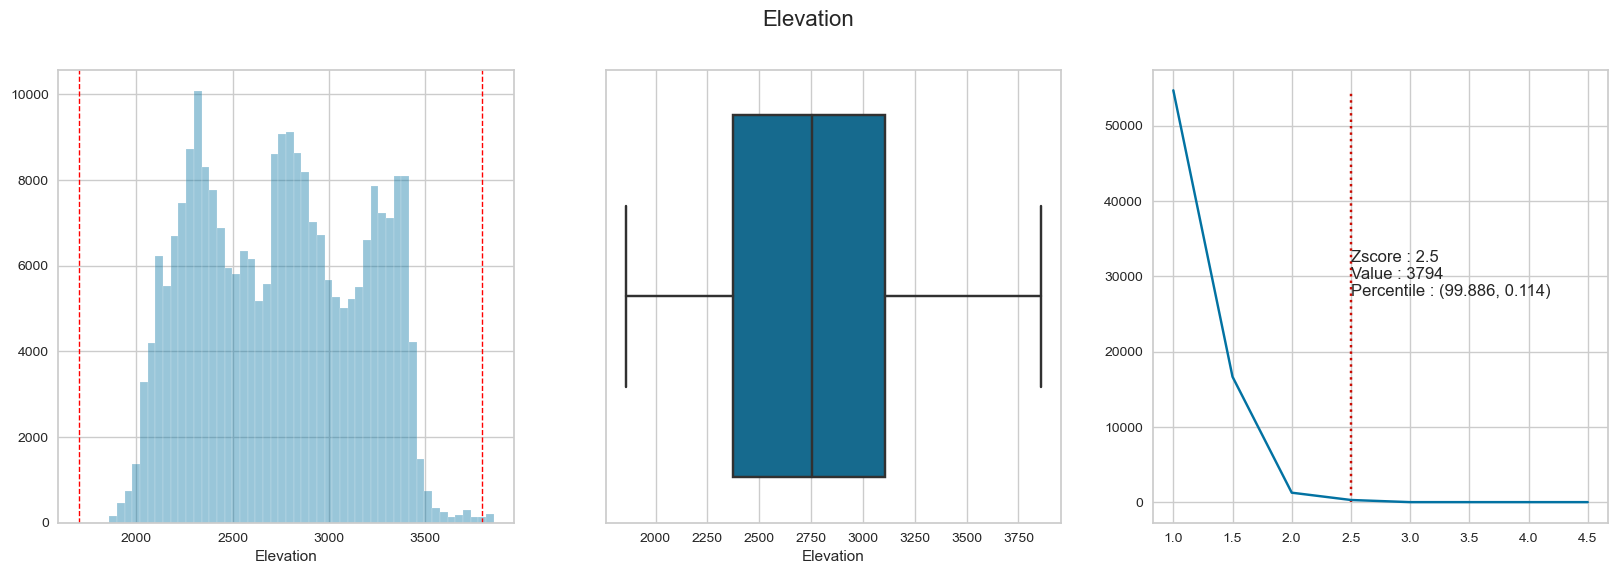

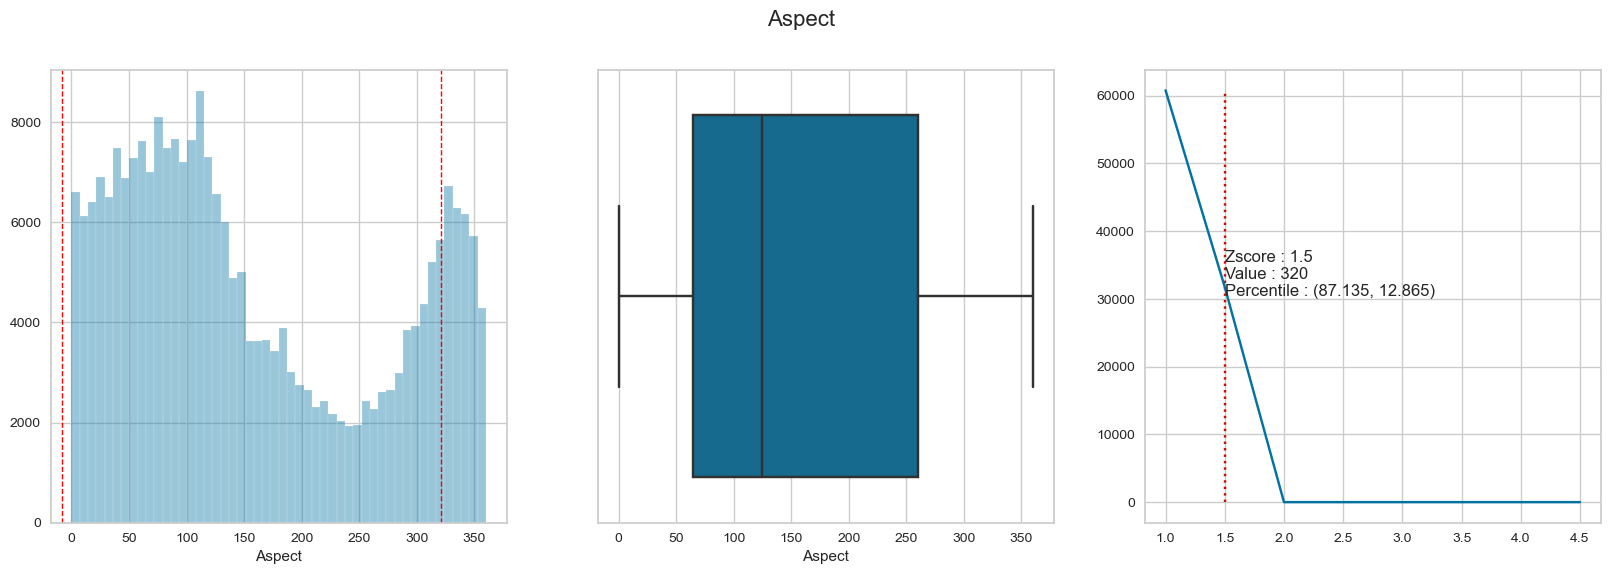

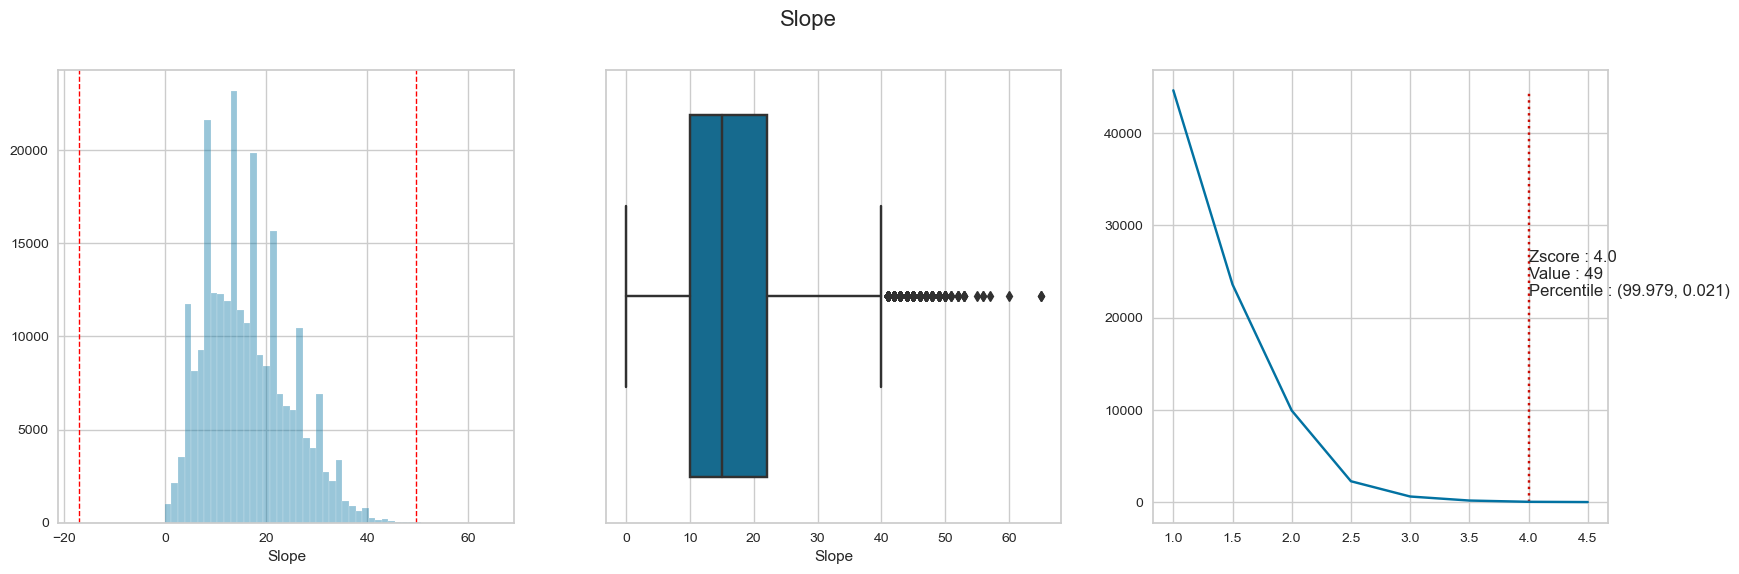

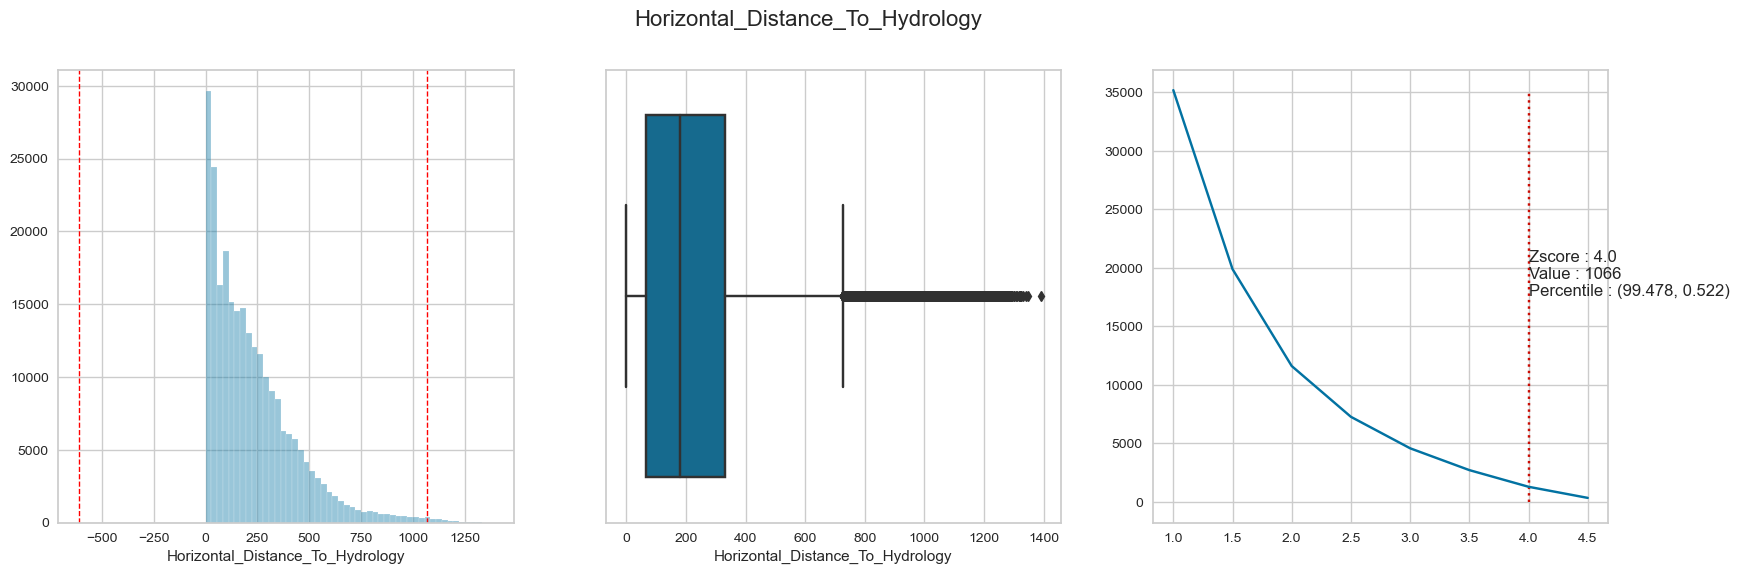

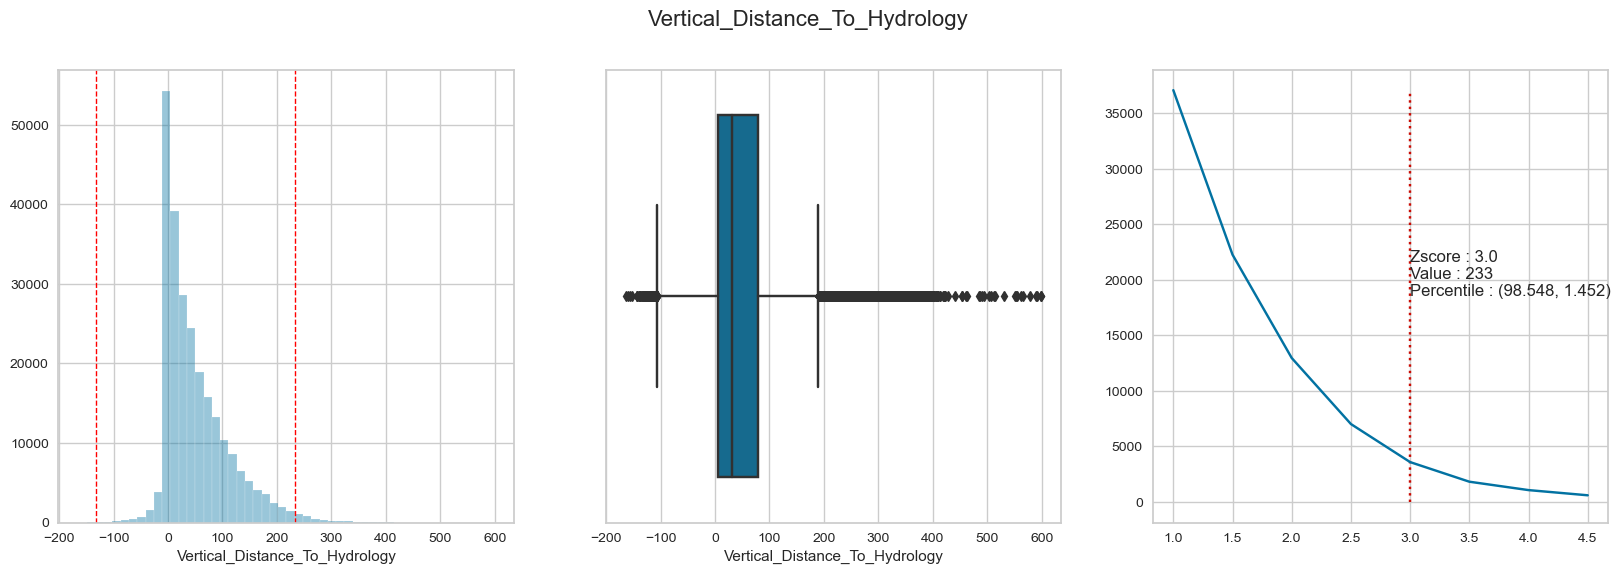

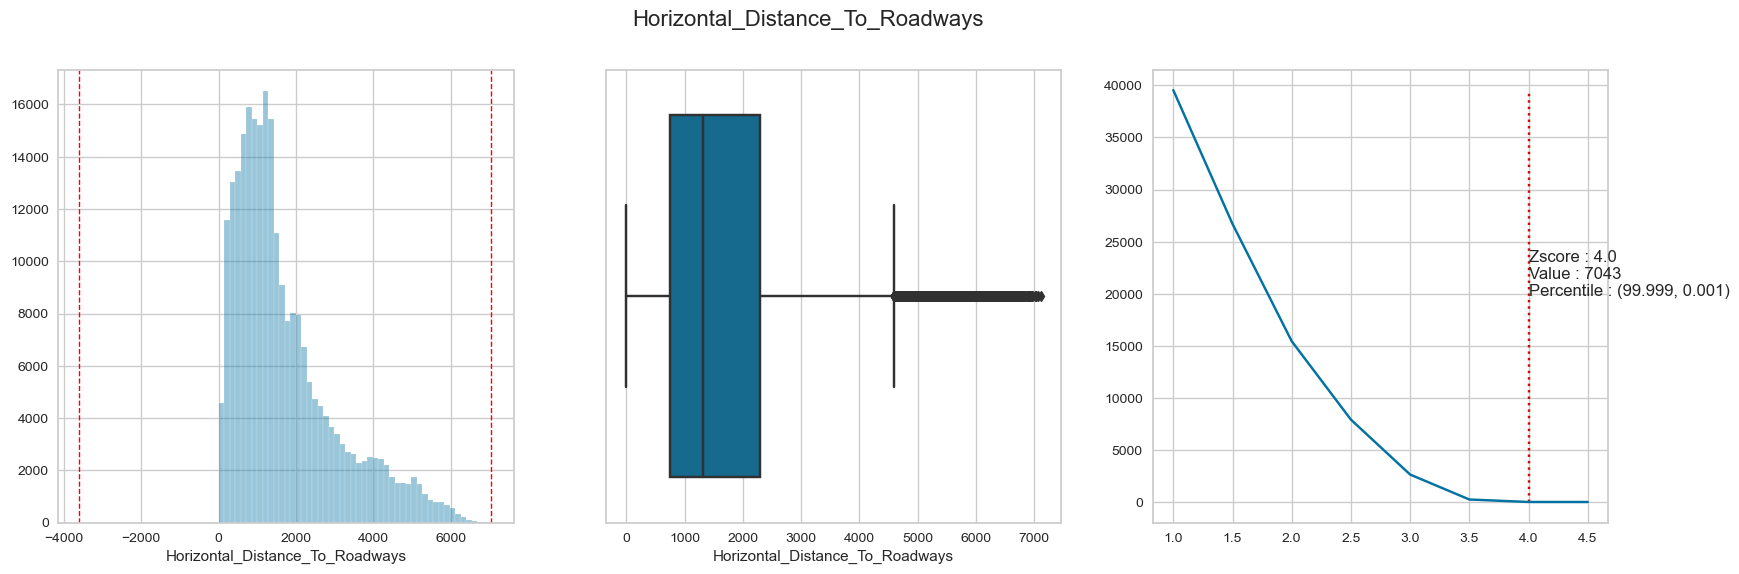

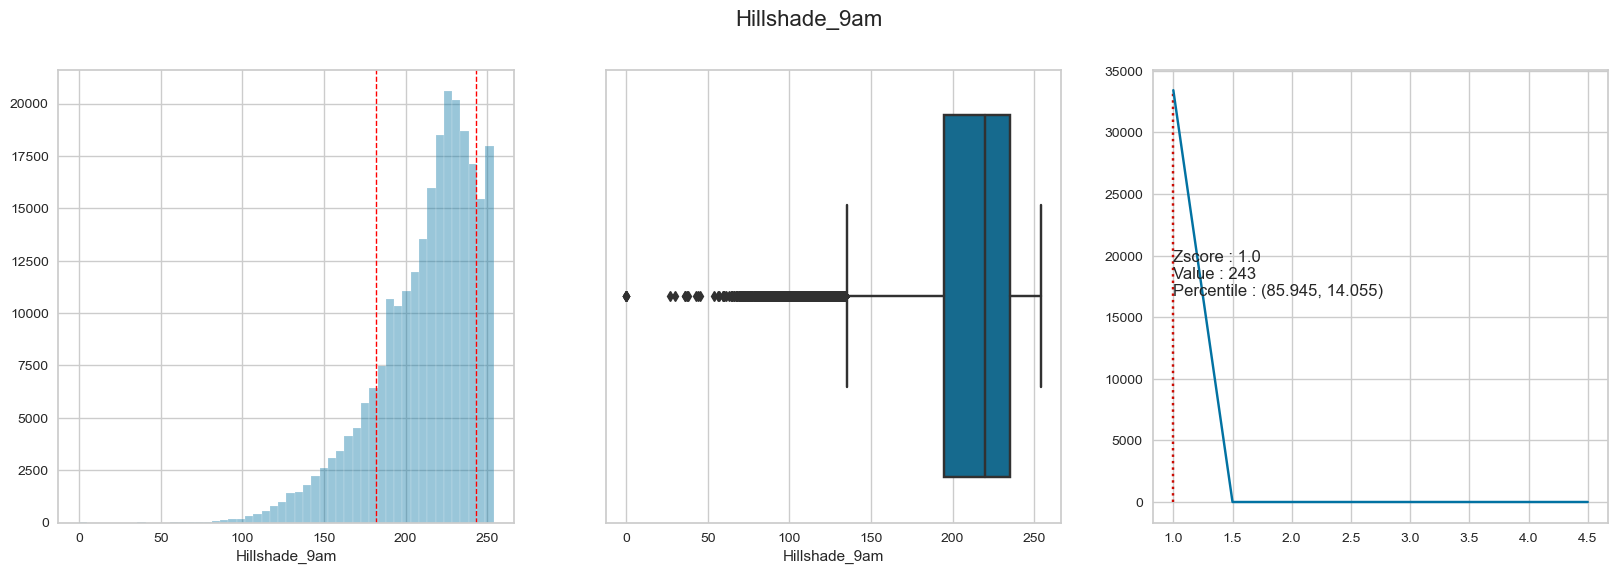

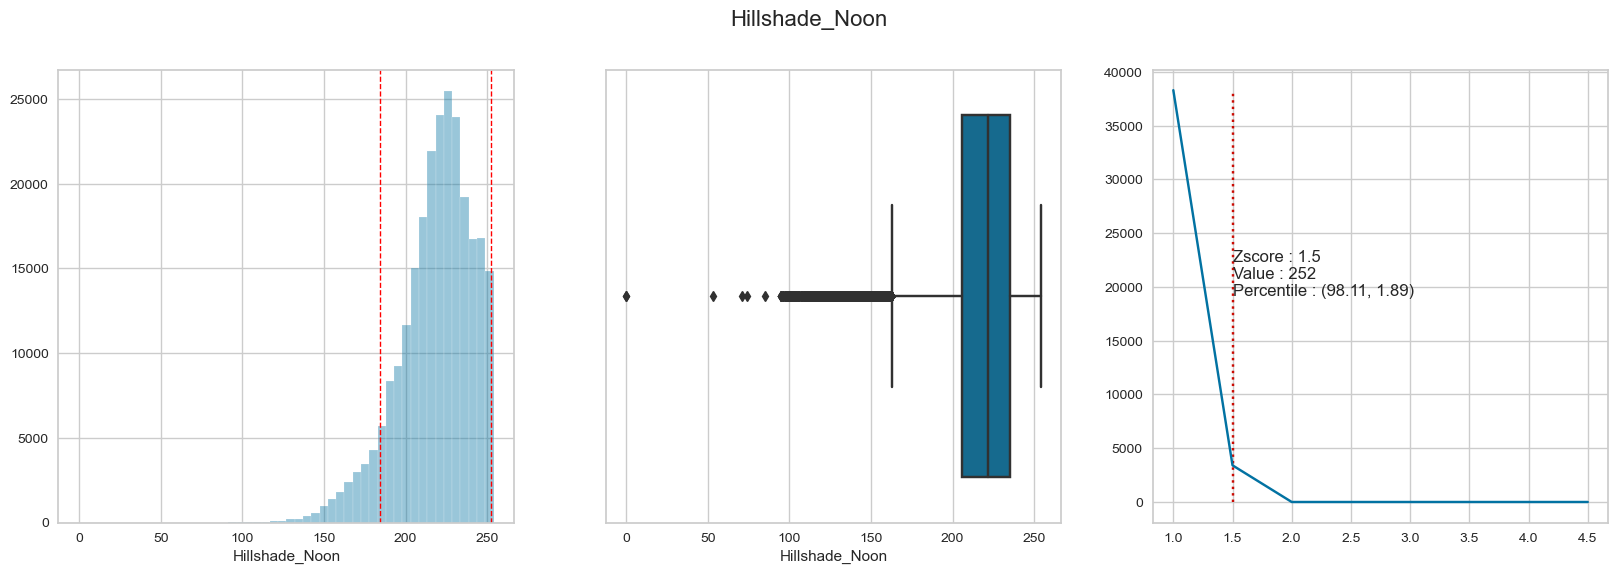

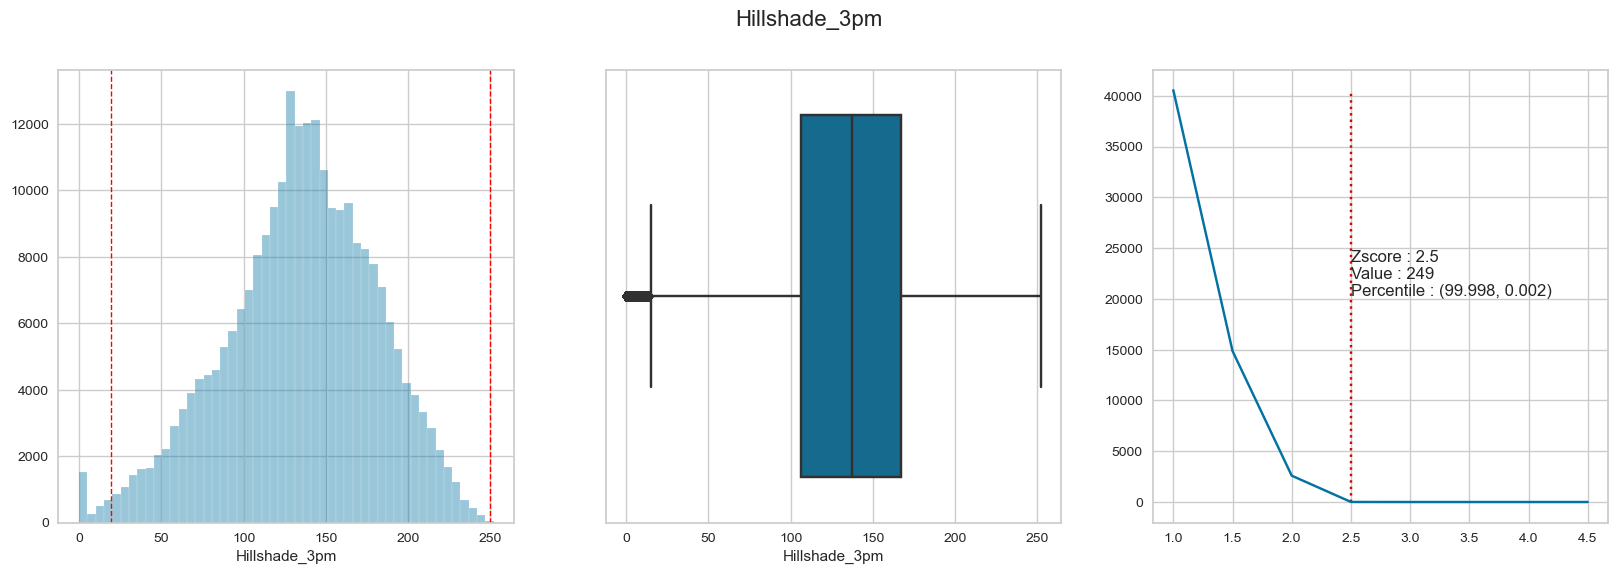

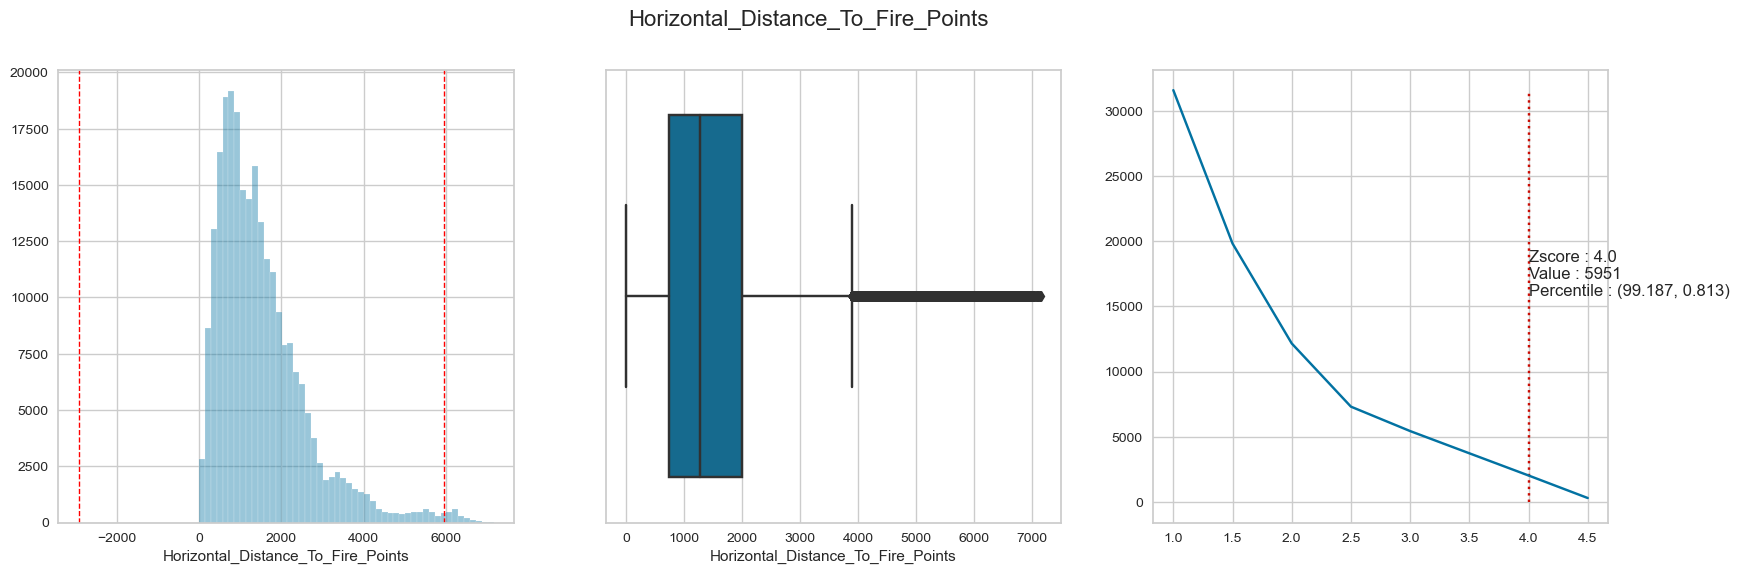

In [123]:
z_scores=[]
for i in df.columns[:10]:
    z_scores.append(outlier_inspect(df,i)[2])

In [124]:
z_scores


[2.5, 1.5, 4.0, 4.0, 3.0, 4.0, 1.0, 1.5, 2.5, 4.0]

In [125]:
df_z=df.copy()
for i in features:
    down_limit= df_z[i].mean() - z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    upper_limit= df_z[i].mean() + z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    condition= (down_limit < df_z[i]) & (df_z[i] < upper_limit)
    df_z=df_z[condition]

In [126]:
print('Number of Outliers:',len(df)-len(df_z))


Number of Outliers: 92560


In [127]:
df_3z=df.copy()
for i in features:
    down_limit= df_3z[i].mean() - (3*df_3z[i].std())
    upper_limit= df_3z[i].mean() + (3*df_3z[i].std())
    condition= (down_limit < df_3z[i]) & (df_3z[i] < upper_limit)
    df_3z=df_3z[condition]

In [128]:
print('Number of Outliers:',len(df)-len(df_3z))


Number of Outliers: 20932


ii. Drop Outliers

In [129]:
k=2
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,k)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [130]:
df=df_winsorised
df.shape

(245758, 55)

In [131]:
df = df.reset_index(drop=True)

In [132]:
df.Cover_Type.value_counts(dropna=False).sort_index()


1    35616
2    35570
3    33280
4    35440
5    35877
6    34633
7    35342
Name: Cover_Type, dtype: int64

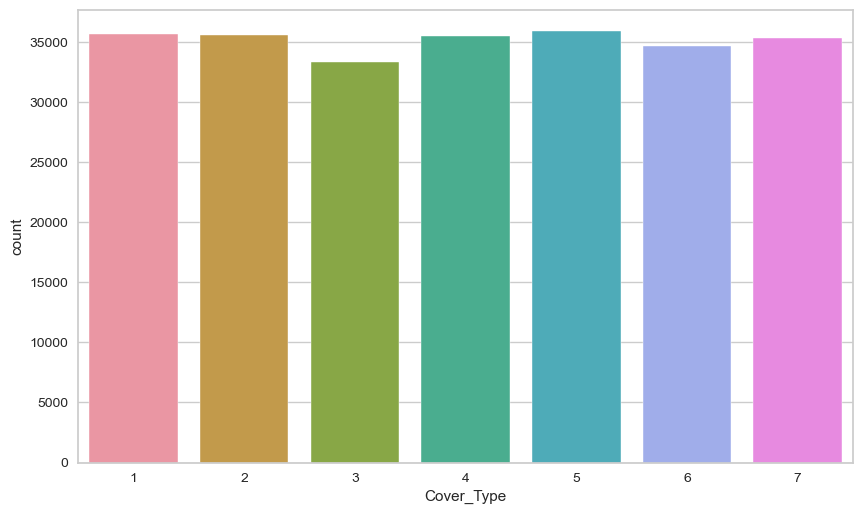

In [133]:
sns.countplot(x='Cover_Type',data=df);


In [134]:
def perc_col(df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [135]:
perc_col(df,'Cover_Type')


Percentage of df["Cover_Type"] Unique Values:

1: %14.49
2: %14.47
3: %13.54
4: %14.42
5: %14.60
6: %14.09
7: %14.38


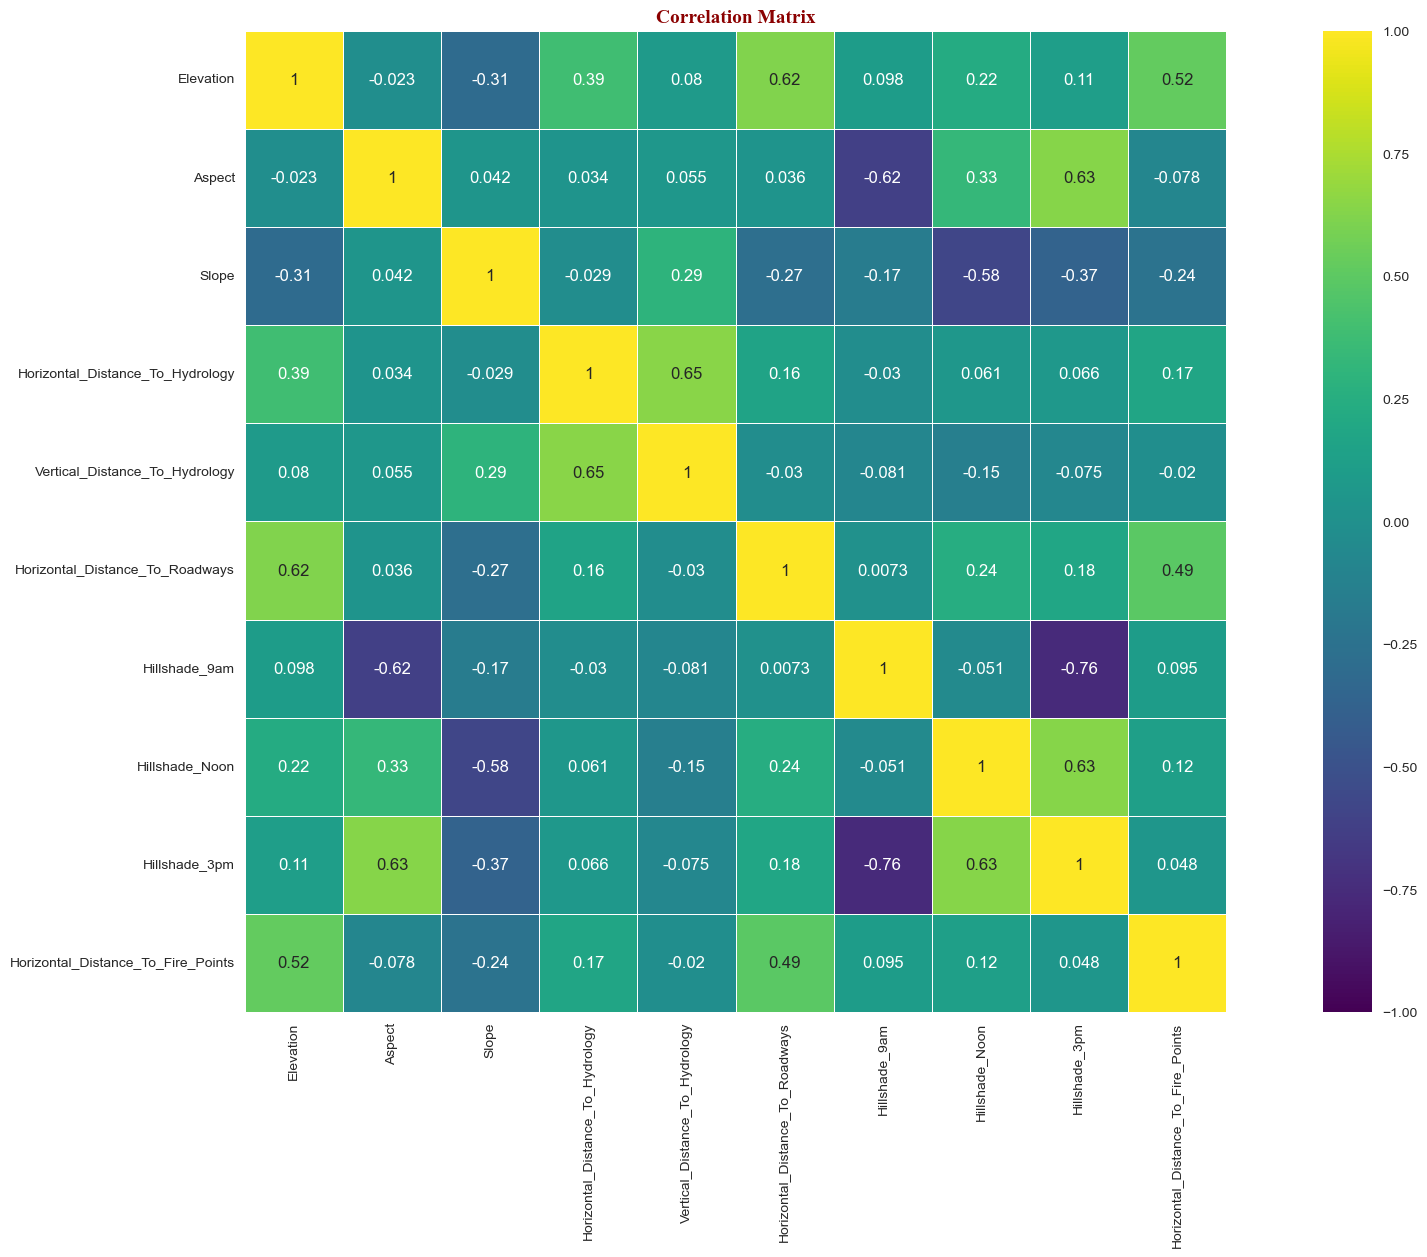

In [136]:
plt.figure(figsize=(25,13))
sns.heatmap(df[df.columns[:10]].corr(),square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245758 entries, 0 to 245757
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           245758 non-null  int64
 1   Aspect                              245758 non-null  int64
 2   Slope                               245758 non-null  int64
 3   Horizontal_Distance_To_Hydrology    245758 non-null  int64
 4   Vertical_Distance_To_Hydrology      245758 non-null  int64
 5   Horizontal_Distance_To_Roadways     245758 non-null  int64
 6   Hillshade_9am                       245758 non-null  int64
 7   Hillshade_Noon                      245758 non-null  int64
 8   Hillshade_3pm                       245758 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  245758 non-null  int64
 10  Wilderness_Area_1                   245758 non-null  int64
 11  Wilderness_Area_2                   245758 non-null 

In [138]:
df['Square_Hypo_Distance'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)
df['Average_Dist_Road_Hydro'] = (df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways'])/2
df['Average_Elevation_Hydro'] = (df['Elevation']+df['Vertical_Distance_To_Hydrology'])/2
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,6,217.366,1228.500,1372.000
1,3269,110,19,134,40,3734,246,216,88,2854,...,0,0,0,1,0,0,1,139.843,1934.000,1654.500
2,3283,322,18,346,104,3818,170,217,185,1330,...,0,0,0,1,0,0,7,361.292,2082.000,1693.500
3,2847,89,28,270,136,1320,246,173,29,889,...,0,0,0,0,0,0,5,302.318,795.000,1491.500
4,3248,93,12,503,118,570,239,221,110,945,...,0,0,0,0,0,0,7,516.656,536.500,1683.000


In [139]:
df.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)

In [140]:
df.shape

(245758, 56)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [141]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

In [142]:
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [143]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [144]:
X.shape

(245758, 55)

In [145]:
y.shape

(245758,)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
from sklearn.preprocessing import StandardScaler


In [148]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [149]:
svm = LinearSVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

Evaluate the Performance

In [150]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [151]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.673583984375 
svm_f1_score: 0.6678815602431859 
svm_recall: 0.673583984375


In [152]:
from yellowbrick.classifier import ConfusionMatrix
def confusionmatrix(model,X_train,y_train,X_test,y_test):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()



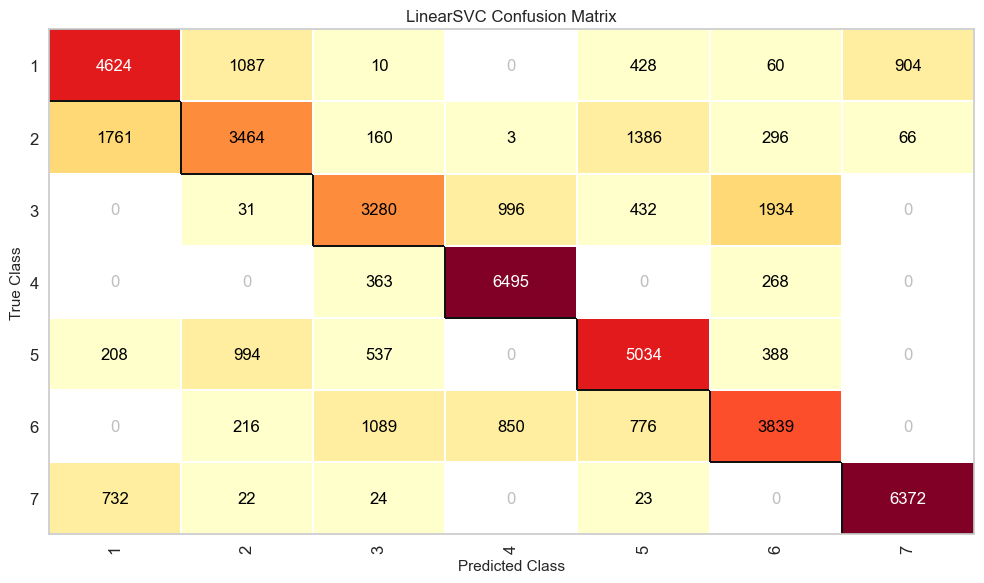

In [153]:
confusionmatrix(svm,X_train,y_train,X_test,y_test)

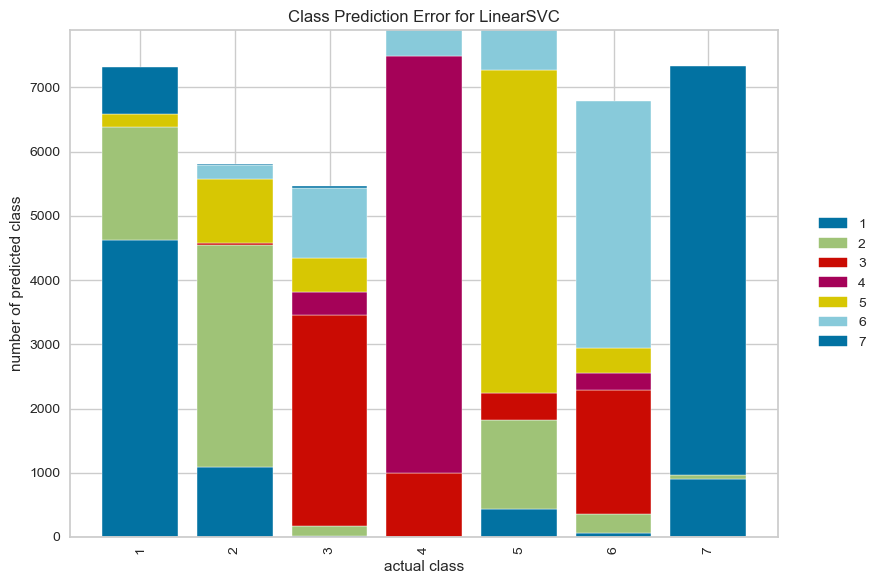

In [154]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

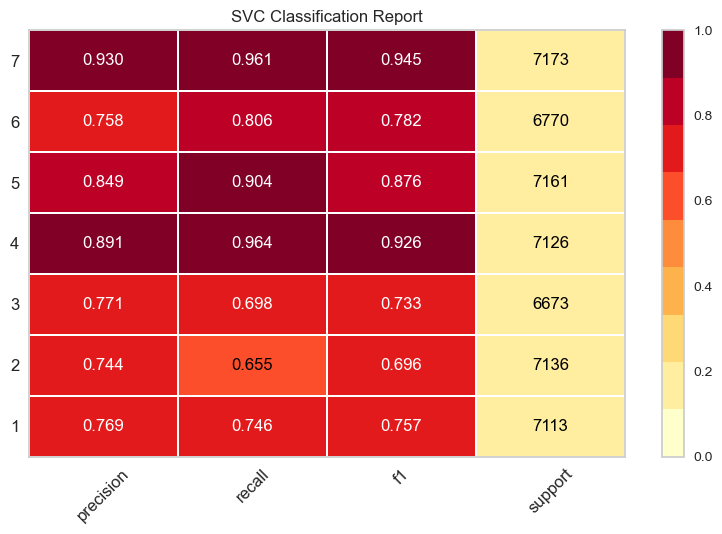

In [63]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [155]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[4624 1087   10    0  428   60  904]
[1761 3464  160    3 1386  296   66]
[   0   31 3280  996  432 1934    0]
[   0    0  363 6495    0  268    0]
[ 208  994  537    0 5034  388    0]
[   0  216 1089  850  776 3839    0]
[ 732   22   24    0   23    0 6372]
              precision    recall  f1-score   support

           1       0.63      0.65      0.64      7113
           2       0.60      0.49      0.53      7136
           3       0.60      0.49      0.54      6673
           4       0.78      0.91      0.84      7126
           5       0.62      0.70      0.66      7161
           6       0.57      0.57      0.57      6770
           7       0.87      0.89      0.88      7173

    accuracy                           0.67     49152
   macro avg       0.67      0.67      0.67     49152
weighted avg       0.67      0.67      0.67     49152



Tunning SVM

if C=1, soft margin
if C=1000, hard margin
C, margine yakinlik veya uzakligina gore ceza verir.
Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
Gamma buyukse, C onemsiz hale gelir.
0.0001 < Gamma < 10
0.1 < C < 100

In [114]:
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1,0.1,0.01,0.001,0.0001], 
#               'kernel': ['rbf']} 

In [115]:
#from sklearn.svm import LinearSVC
#from sklearn.model_selection import GridSearchCV
#svm_model=LinearSVC(random_state=101)

In [117]:
#svm_model = LinearSVC()
#param_grid = {'C':[0.01,0.1,1,10],'penalty':["l1","l2"],"random_state":[101]}
#grid = GridSearchCV(svm_model,param_grid, cv=5, scoring="accuracy")

In [119]:
#grid.fit(X,y)

In [ ]:
#y_pred = grid.predict(X_test)
#print(classification_report(y_test, y_pred))

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [156]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

In [157]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[6040  870    2    0   30    5  166]
[ 947 5846   89    0  154   83   17]
[   2   72 6250   57   20  272    0]
[   0    1   42 7060    0   23    0]
[  17   71   16    0 7049    7    1]
[   5   44  193   31    8 6489    0]
[  99   12    0    0    0    0 7062]
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      7113
           2       0.85      0.82      0.83      7136
           3       0.95      0.94      0.94      6673
           4       0.99      0.99      0.99      7126
           5       0.97      0.98      0.98      7161
           6       0.94      0.96      0.95      6770
           7       0.97      0.98      0.98      7173

    accuracy                           0.93     49152
   macro avg       0.93      0.93      0.93     49152
weighted avg       0.93      0.93      0.93     49152



In [159]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score,
      '\ndt_recall:',dt_recall)

dt_accuracy: 0.9317220052083334 
dt_f1_score: 0.931388999349179 
dt_recall: 0.9317220052083334


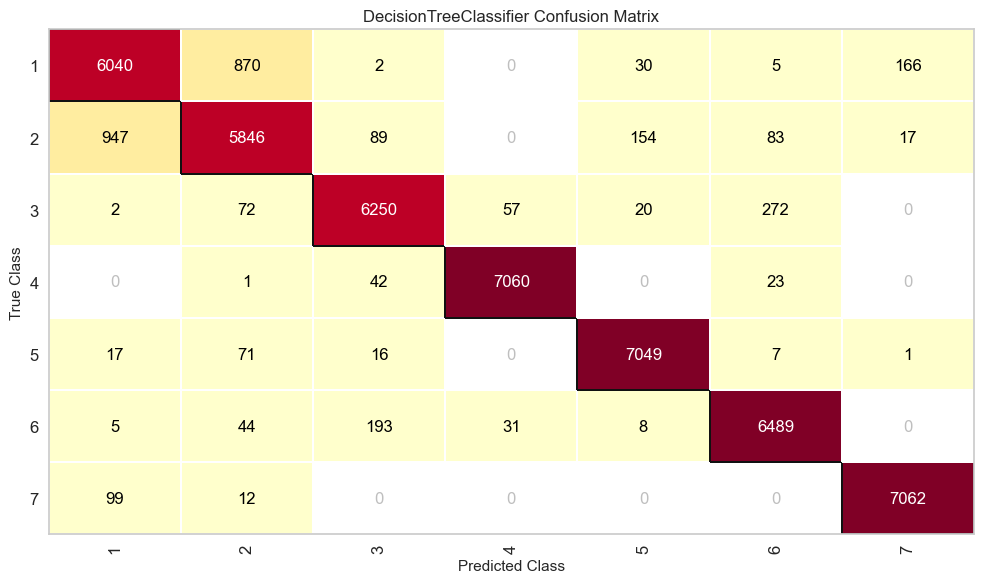

In [160]:
confusionmatrix(dt,X_train,y_train,X_test,y_test)

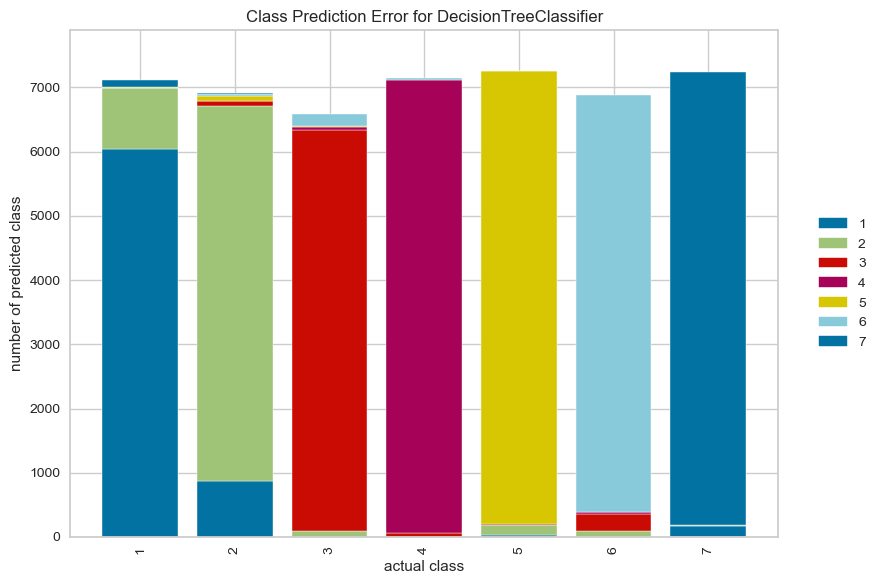

In [161]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [162]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
y_pred = rfc.predict(X_test)


In [164]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[6390  581    2    0   25    7  108]
[ 523 6320   77    0  122   83   11]
[   0    9 6460   55    7  142    0]
[   0    0    6 7119    0    1    0]
[   0   14    8    0 7136    3    0]
[   0    4   55   24    3 6684    0]
[  14    6    0    0    1    0 7152]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      7113
           2       0.91      0.89      0.90      7136
           3       0.98      0.97      0.97      6673
           4       0.99      1.00      0.99      7126
           5       0.98      1.00      0.99      7161
           6       0.97      0.99      0.98      6770
           7       0.98      1.00      0.99      7173

    accuracy                           0.96     49152
   macro avg       0.96      0.96      0.96     49152
weighted avg       0.96      0.96      0.96     49152



In [165]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9615275065104166 
rfc_f1_score: 0.9611979648161889 
rfc_recall: 0.9615275065104166


In [ ]:
#rfc_accuracy = cross_val_score(rfc, X_test, y_test,cv = 10).mean()
#rfc_f1_score = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
#rfc_recall = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
#print('rfc_accuracy:',rfc_accuracy,
#      '\nrfc_f1_score:',rfc_f1_score,
#      '\nrfc_recall:',rfc_recall)

In [69]:
#rfc_params = {"n_estimators":[50, 100, 300],
#              "max_depth":[3,5,7],
#              "max_features": [2,4,6,8],
#              "min_samples_split": [2,4,6]}

In [70]:
#rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   5.2s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   5.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=  10.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=  10.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; t

In [71]:
#rfc_grid.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 4,
 'n_estimators': 300}

In [72]:
#rfc_tuned = RandomForestClassifier(max_depth = 7,             
#                                  max_features = 8, 
#                                  min_samples_split = 2, 
#                                  n_estimators = 1000).fit(X_train, y_train)

In [73]:
#y_pred = rfc_tuned.predict(X_test)
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.64      0.65      7113
           2       0.71      0.46      0.56      7136
           3       0.77      0.53      0.63      6673
           4       0.82      0.98      0.89      7126
           5       0.68      0.87      0.76      7161
           6       0.70      0.75      0.72      6770
           7       0.84      0.94      0.89      7173

    accuracy                           0.74     49152
   macro avg       0.74      0.74      0.73     49152
weighted avg       0.74      0.74      0.73     49152



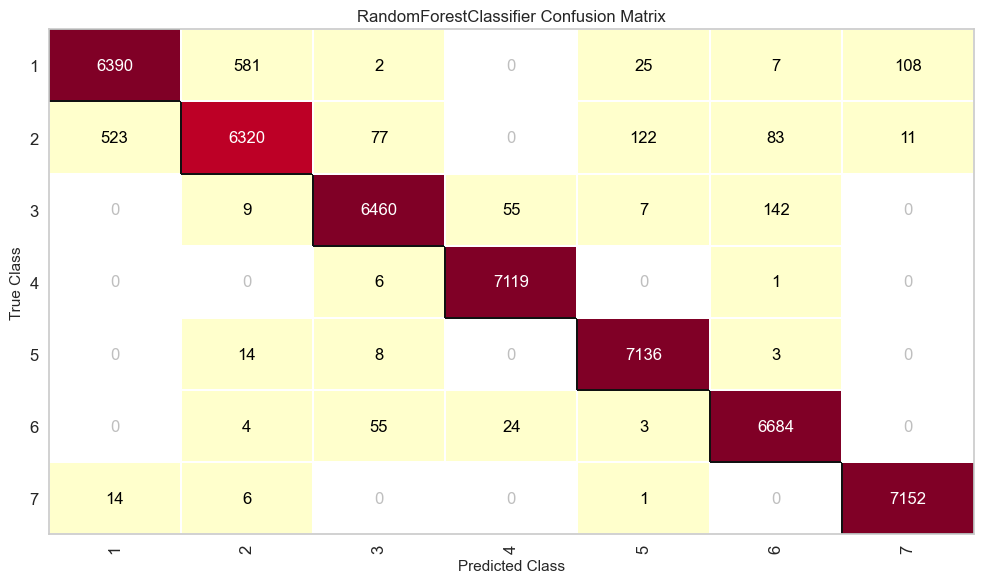

In [167]:
confusionmatrix(rfc,X_train,y_train,X_test,y_test)

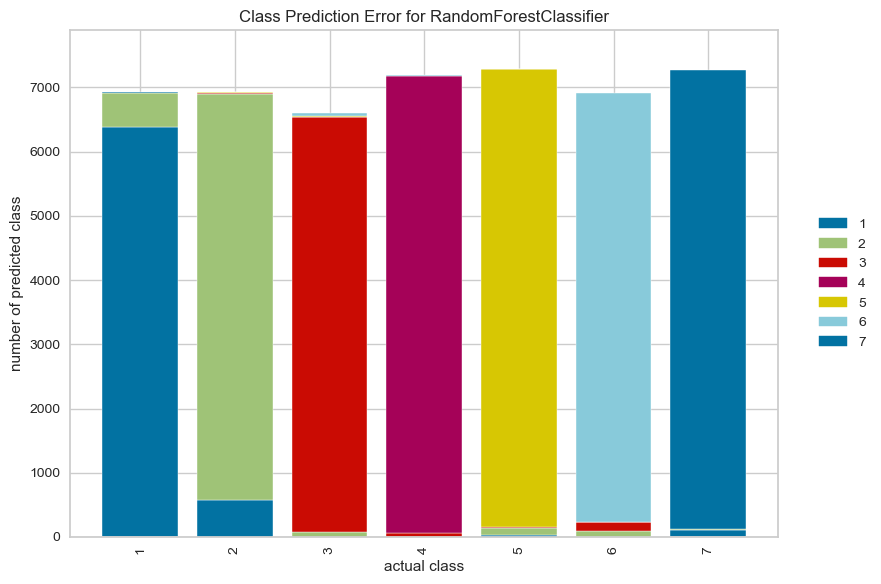

In [168]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [169]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

[11:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [170]:
y_pred = xgb.predict(X_test)


In [171]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.85      0.83      0.84      7113
           2       0.85      0.78      0.82      7136
           3       0.94      0.90      0.92      6673
           4       0.99      1.00      0.99      7126
           5       0.94      0.99      0.96      7161
           6       0.91      0.96      0.93      6770
           7       0.96      0.99      0.98      7173

    accuracy                           0.92     49152
   macro avg       0.92      0.92      0.92     49152
weighted avg       0.92      0.92      0.92     49152



In [172]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9212849934895834 
xgb_f1_score: 0.9201770290026158 
xgb_recall: 0.9212849934895834


In [173]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
#xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
#xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5, 
#                             n_iter=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
#xgb_grid.best_params_

In [ ]:
#xgb_tuned = XGBClassifier(learning_rate= 0.3, 
#                                max_depth= 15, 
#                                n_estimators= 200, 
#                                subsample= 0.7).fit(X_train, y_train)

In [ ]:
#y_pred = xgb_tuned.predict(X_test)
#print(classification_report(y_test, y_pred))

In [174]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9212849934895834 
xgb_f1_score: 0.9201770290026158 
xgb_recall: 0.9212849934895834


In [ ]:
#xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
#xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
#xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
#print('xgb_accuracy:',xgb_accuracy,
#      '\nxgb_f1_score:',xgb_f1_score,
#      '\nxgb_recall:',xgb_recall)

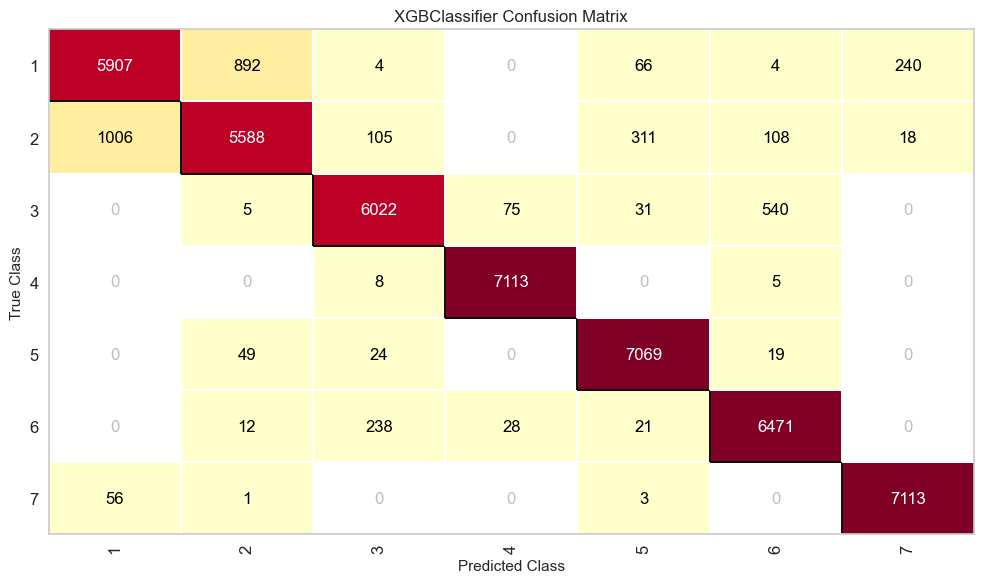

In [175]:
confusionmatrix(xgb,X_train,y_train,X_test,y_test)

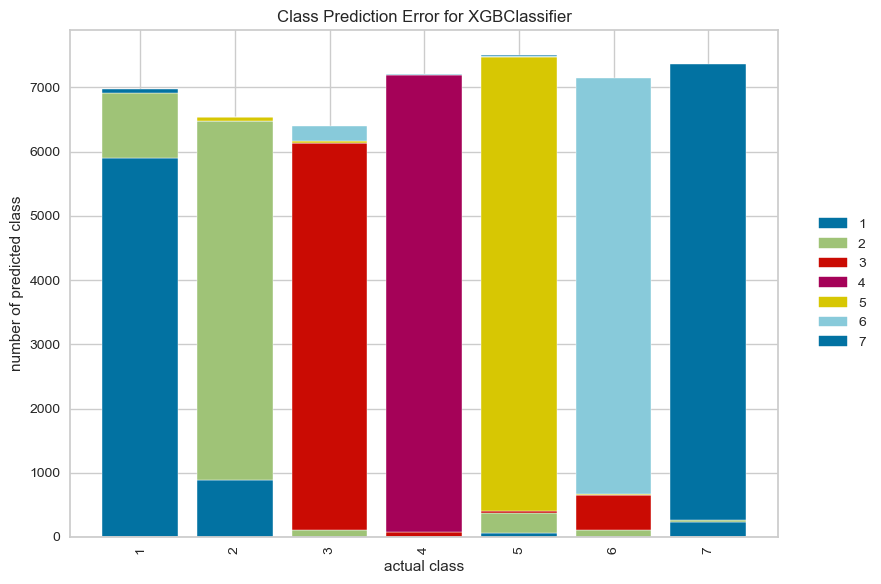

In [176]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison
# F1 Score Comparison

In [177]:
compare = pd.DataFrame({
"Model": ['Support Vector Machine',"Decision Tree", "Random Forest", "XGBoost"],
"Accuracy": [svm_accuracy,dt_accuracy,rfc_accuracy,xgb_accuracy],
"F1 Score": [svm_f1_score,dt_f1_score,rfc_f1_score,xgb_f1_score],
"Recall": [svm_recall,dt_recall,rfc_recall,xgb_recall]})

In [178]:
compare

,Model,Accuracy,F1 Score,Recall
0,Support Vector Machine,0.674,0.668,0.674
1,Decision Tree,0.932,0.931,0.932
2,Random Forest,0.962,0.961,0.962
3,XGBoost,0.921,0.920,0.921


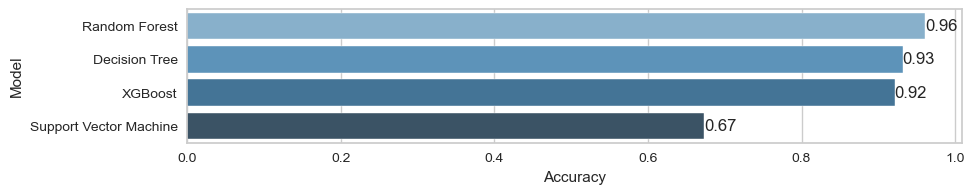

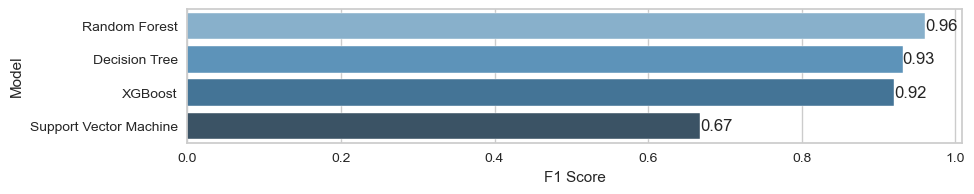

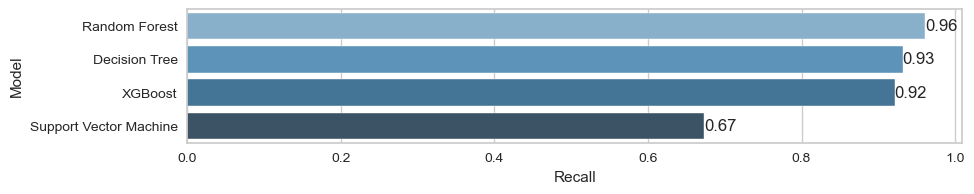

In [179]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Final Model

In [195]:
import pickle

In [196]:
final_model = RandomForestClassifier(random_state=101).fit(X, y)

In [197]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [198]:
input={  'Elevation': 3056,
         'Aspect': 272,
         'Slope': 6,
         'Horizontal_Distance_To_Hydrology':319,
         'Vertical_Distance_To_Hydrology': 60,
         'Horizontal_Distance_To_Roadways': 1642,
         'Hillshade_9am':204,
         'Hillshade_Noon':242,
         'Hillshade_3pm':176,
         'Horizontal_Distance_To_Fire_Points':1591,
         'Soil_Type1': 0,
         'Soil_Type10':0,
         'Soil_Type11':0,
         'Soil_Type12':0,
         'Soil_Type13':0,
         'Soil_Type14':0,
         'Soil_Type16':0,
         'Soil_Type17':0,
         'Soil_Type18':0,
         'Soil_Type19':0,
         'Soil_Type2':0,
         'Soil_Type20':0,
         'Soil_Type21':0,
         'Soil_Type22':0,
         'Soil_Type23':1,
         'Soil_Type24':0,
         'Soil_Type25':0,
         'Soil_Type26':0,
         'Soil_Type27':0,
         'Soil_Type28':0,
         'Soil_Type29':0,
         'Soil_Type3':0,
         'Soil_Type30':0,
         'Soil_Type31':0,
         'Soil_Type32':0,
         'Soil_Type33':0,
         'Soil_Type34':0,
         'Soil_Type35':0,
         'Soil_Type36':0,
         'Soil_Type37':0,
         'Soil_Type38':0,
         'Soil_Type39':0,
         'Soil_Type4':0,
         'Soil_Type40':0,
         'Soil_Type5':0,
         'Soil_Type6':0,
         'Soil_Type7':0,
         'Soil_Type8':0,
         'Soil_Type9':0,
         'Wilderness_Area1':0,
         'Wilderness_Area2':0,
         'Wilderness_Area3':1,
         'Wilderness_Area4':0}


In [199]:
my_dict = pd.DataFrame([input])
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,3056,272,6,319,60,1642,204,242,176,1591,...,0,0,0,0,0,0,0,0,1,0


In [200]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,3056,272,6,1642,204,242,176,1591,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
final_model.predict(my_dict)

array([1])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___